# 2022 Emilia Romagna Grand Prix Analysis

In [1]:
# !jt -t grade3 -T -f liberation -tf loraserif -fs 11 -ofs 10 -dfs 10 -tfs 11 -lineh 150 -cursw 3 -cursc r -cellw 100%

In [2]:
# !jt -t gruvboxd -T -f liberation -tf loraserif -fs 11 -ofs 10 -dfs 11 -tfs 11 -lineh 150 -cursw 3 -cursc r -cellw 100%

In [3]:
import fastf1 as ff1
from fastf1 import plotting
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1', misc_mpl_mods=True)
from fastf1 import utils
from fastf1.core import Laps
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from timple.timedelta import strftimedelta
plotting.setup_mpl()
ff1.Cache.enable_cache('C:/Users/EDGAR/Jupyter Files/FastF1Cache')

## Qualifying Analysis

In [4]:
year=2022
circuit='Emilia Romagna Grand Prix'
quali=ff1.get_session(year,circuit,'Q')
quali.load()
laps=quali.load_laps()

utils          INFO 	Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils          INFO 	NumExpr defaulting to 8 threads.
core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '4', '20', '14', '3', '11', '77', '5', '55', '63', '47', '44', '24', '18', '22', '10', '6', '31', '23

In [5]:
laps2=pd.DataFrame(quali.laps)
# quali.results[['Q3','LastName']]

In [6]:
#Aggregating the two DataFrames into one, to be easier to work with.
results=pd.DataFrame(quali.results)
fsq=laps2.copy()
fsq=pd.merge(fsq,results,on='DriverNumber',how='outer')
fsq=fsq.drop(['Time_y','Status','Points','GridPosition'],axis=1)
fsq=fsq.rename(columns={'Time_x':'Time'})
fsq

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,Q1,Q2,Q3
0,0 days 00:13:50.012000,1,NaT,1,1,0 days 00:12:06.675000,NaT,NaT,0 days 00:00:31.252000,0 days 00:00:44.046000,NaT,0 days 00:13:06.245000,0 days 00:13:50.016000,203.0,244.0,270.0,95.0,False,INTERMEDIATE,13.0,False,0 days 00:12:06.675000,Red Bull Racing,VER,1,False,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000
1,0 days 00:15:15.527000,1,0 days 00:01:25.515000,2,1,NaT,NaT,0 days 00:00:26.791000,0 days 00:00:29.703000,0 days 00:00:29.021000,0 days 00:14:16.803000,0 days 00:14:46.506000,0 days 00:15:15.527000,210.0,250.0,269.0,286.0,False,INTERMEDIATE,14.0,False,0 days 00:13:50.012000,Red Bull Racing,VER,1,True,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000
2,0 days 00:28:52.052000,1,NaT,3,2,NaT,0 days 00:17:14.799000,0 days 00:00:33.488000,0 days 00:00:30.679000,NaT,0 days 00:15:49.163000,0 days 00:16:19.701000,NaT,193.0,239.0,NaN,NaN,False,INTERMEDIATE,13.0,False,0 days 00:15:15.527000,Red Bull Racing,VER,5,False,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000
3,0 days 00:30:27.391000,1,NaT,4,2,0 days 00:28:52.052000,NaT,NaT,0 days 00:00:31.959000,0 days 00:00:35.119000,NaT,0 days 00:29:52.368000,0 days 00:30:27.624000,197.0,201.0,272.0,116.0,False,SOFT,2.0,True,0 days 00:28:52.052000,Red Bull Racing,VER,1,False,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000
4,0 days 00:31:48.878000,1,0 days 00:01:21.487000,5,2,NaT,NaT,0 days 00:00:26.384000,0 days 00:00:27.552000,0 days 00:00:27.551000,0 days 00:30:53.775000,0 days 00:31:21.327000,0 days 00:31:48.878000,214.0,257.0,274.0,293.0,False,SOFT,3.0,True,0 days 00:30:27.391000,Red Bull Racing,VER,1,True,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0 days 00:35:30.033000,31,0 days 00:02:02.266000,8,3,0 days 00:33:54.276000,NaT,0 days 00:00:54.647000,0 days 00:00:37.095000,0 days 00:00:30.524000,0 days 00:34:22.414000,0 days 00:34:59.509000,0 days 00:35:30.033000,198.0,237.0,271.0,232.0,False,SOFT,2.0,True,0 days 00:33:27.767000,Alpine,OCO,2,False,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,19.0,0 days 00:01:22.338000,NaT,NaT
340,0 days 00:37:40.336000,31,0 days 00:02:10.303000,9,3,NaT,0 days 00:37:31.714000,0 days 00:00:26.648000,0 days 00:00:27.980000,0 days 00:01:15.675000,0 days 00:35:56.681000,0 days 00:36:24.661000,0 days 00:37:40.336000,213.0,206.0,NaN,85.0,False,SOFT,3.0,True,0 days 00:35:30.033000,Alpine,OCO,1,False,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,19.0,0 days 00:01:22.338000,NaT,NaT
341,0 days 00:13:01.907000,23,NaT,1,2,0 days 00:11:05.924000,0 days 00:12:57.461000,NaT,0 days 00:00:35.918000,0 days 00:00:48.836000,NaT,0 days 00:12:13.071000,0 days 00:13:02.053000,168.0,234.0,NaN,94.0,False,INTERMEDIATE,1.0,True,0 days 00:11:05.924000,Williams,ALB,1,False,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,20.0,NaT,NaT,NaT
342,0 days 00:15:05.078000,23,0 days 00:02:03.171000,2,2,0 days 00:13:31.287000,NaT,0 days 00:00:59.055000,0 days 00:00:32.590000,0 days 00:00:31.526000,0 days 00:14:00.962000,0 days 00:14:33.552000,0 days 00:15:05.078000,192.0,239.0,27

### Fastest Sectors in Qualifying

In [7]:
s3=fsq.loc[fsq['Sector3Time']==min(fsq['Sector3Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time']]
s2=fsq.loc[fsq['Sector2Time']==min(fsq['Sector2Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time']]
s1=fsq.loc[fsq['Sector1Time']==min(fsq['Sector1Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time']]
s123=pd.concat([s1,s2,s3],ignore_index=True)
s123

,LapTime,Driver,Sector1Time,Sector2Time,Sector3Time
0,NaT,PER,0 days 00:00:25.151000,NaT,NaT
1,0 days 00:01:18.793000,VER,0 days 00:00:25.472000,0 days 00:00:26.850000,0 days 00:00:26.471000
2,0 days 00:01:18.796000,LEC,0 days 00:00:25.581000,0 days 00:00:26.959000,0 days 00:00:26.256000


### Fastest Laps in Q1, Q2, Q3

In [8]:
flq1=fsq.loc[fsq['LapTime'] == min(fsq['Q1'].dropna())]
flq2=fsq.loc[fsq['LapTime'] == min(fsq['Q2'].dropna())]
flq3=fsq.loc[fsq['LapTime'] == min(fsq['Q3'].dropna())]
flqs=pd.concat([flq1,flq2,flq3],ignore_index=True)
flqs[['Driver','Team','Compound','Q1','Q2','Q3']]

,Driver,Team,Compound,Q1,Q2,Q3
0,LEC,Ferrari,SOFT,0 days 00:01:18.796000,0 days 00:01:19.584000,0 days 00:01:28.778000
1,VER,Red Bull Racing,SOFT,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000
2,VER,Red Bull Racing,INTERMEDIATE,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000


### Minisector Comparison between Top 4 Qualifying Drivers
Can't calculate this yet because I need to access Q3 laps, otherwise the minisector graph does not display the correct results.

#### Who are the top 4 qualifying drivers?

In [9]:
quali.results[:4]
#, Leclerc,Verstappen,Perez,Norris<

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0.0,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000,NaT,,0.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,0.0,0 days 00:01:18.796000,0 days 00:01:19.584000,0 days 00:01:28.778000,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,3.0,0.0,0 days 00:01:20.168000,0 days 00:01:19.294000,0 days 00:01:29.131000,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,4.0,0.0,0 days 00:01:20.147000,0 days 00:01:19.902000,0 days 00:01:29.164000,NaT,,0.0


In [10]:
# #Getting the laps from all 4 drivers
# llec=laps.pick_driver('LEC')
# lver=laps.pick_driver('VER')
# lnor=laps.pick_driver('NOR')
# lmag=laps.pick_driver('MAG')
# #Getting telemetry data from drivers
# flec=llec.pick_fastest().get_telemetry().add_distance()
# fver=lver.pick_fastest().get_telemetry().add_distance()
# fnor=lnor.pick_fastest().get_telemetry().add_distance()
# fmag=lper.pick_fastest().get_telemetry().add_distance()
# #Creating Driver column
# flec['Driver']='LEC'
# fver['Driver']='VER'
# fnor['Driver']='NOR'
# fmag['Driver']='MAG'
# #Getting everything in one dataframe
# t1=flec.append(fver)
# t2=t1.append(fnor)
# telemetry=t2.append(fmag)

In [11]:
# telemetry

In [12]:
#Creating the minisectors (doing 30 - 10 per sector)
# nmini=30
# #Grabbing circuit distance
# cdist=max(telemetry['Distance'])
# #Dividing circuit distance by number of minisectors to have our minisector distance
# minilen=cdist/nmini
# #Calculating distances at which the next minisector begins
# minis=[0]
# for b in range(0,(nmini-1)):
#     minis.append(minilen*(b+1))
# #Assigning every row in the dataset to a minisector, so we always know which minisector the cars were located in.
# telemetry['Minisector']=telemetry['Distance'].apply(
#     lambda dist:(
#         int((dist // minilen)+1)))

In [13]:
# #Finding the fastest driver per minisector so we can color it in the minisector map
# avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
# fastest = avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
# fastest = fastest[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

In [14]:
# fastest['Fastest_Driver'].unique()
# #4 drivers had a fastest minisector
# # fastest['Fastest_Driver']=='LEC'

In [15]:
# # Fastest driver per minisector + telemetry
# telemetry = telemetry.merge(fastest, on=['Minisector'])

# # Ordering by distance
# telemetry = telemetry.sort_values(by=['Distance'])

# # Converting driver name to integer
# telemetry.loc[telemetry['Fastest_Driver'] == 'MAG', 'Fastest_Driver_int'] = 3
# telemetry.loc[telemetry['Fastest_Driver'] == 'VER', 'Fastest_Driver_int'] = 1
# telemetry.loc[telemetry['Fastest_Driver'] == 'NOR', 'Fastest_Driver_int'] = 2
# # telemetry.loc[telemetry['Fastest_Driver'] == 'PER', 'Fastest_Driver_int'] = 3

In [16]:
# # Finally, plotting.
# x = np.array(telemetry['X'].values)
# y = np.array(telemetry['Y'].values)

# points = np.array([x, y]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)
# fastest_driver_array = telemetry['Fastest_Driver_int'].to_numpy().astype(float)

# cmap = cm.get_cmap('Set1', 4)
# lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
# lc_comp.set_array(fastest_driver_array)
# lc_comp.set_linewidth(5)

# # plt.rcParams['figure.figsize'] = [18, 10]
# plt.gcf().set_size_inches(19.2,10.8)
# plt.gca().add_collection(lc_comp)
# plt.axis('equal')
# plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
# plt.title(f'{year} {circuit} Qualifying Minisectors',color='white')
# cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,6))
# cbar.set_ticks(np.arange(1.5, 9.5))
# cbar.set_ticklabels(['VER Fastest', 'NOR Fastest','MAG Fastest'])

# plt.savefig(f"{year} {circuit} Qualifying Minisectors.jpeg", dpi=100)

# plt.show()

### Qualifying Time Difference Graph

In [17]:
#Getting every driver
drv = pd.unique(quali.laps['Driver'])
drv=np.array(drv)
drv

array(['VER', 'LEC', 'NOR', 'MAG', 'ALO', 'RIC', 'PER', 'BOT', 'VET',
       'SAI', 'RUS', 'MSC', 'HAM', 'ZHO', 'STR', 'TSU', 'GAS', 'LAT',
       'OCO', 'ALB'], dtype=object)

In [18]:
#Sorting laps by LapTime
fl_list= list()
for d in drv:
    drv_fl = quali.laps.pick_driver(d).pick_fastest()
    fl_list.append(drv_fl)
fl = Laps(fl_list).sort_values(by='LapTime').reset_index(drop=True)

In [19]:
#getting the fastest lap
pole=fl.pick_fastest()
fl['LapTimeDiff']=fl['LapTime']-pole['LapTime']
# print(fl[['Driver', 'LapTime', 'LapTimeDiff']])
fl=fl.drop(index=19)
print(fl[['Driver', 'LapTime', 'LapTimeDiff']])

   Driver                LapTime            LapTimeDiff
0     SAI 0 days 00:01:18.990000        0 days 00:00:00
1     TSU 0 days 00:01:20.474000 0 days 00:00:01.484000
2     GAS 0 days 00:01:20.732000 0 days 00:00:01.742000
3     RUS 0 days 00:01:20.757000 0 days 00:00:01.767000
4     MSC 0 days 00:01:20.916000 0 days 00:00:01.926000
5     HAM 0 days 00:01:21.138000 0 days 00:00:02.148000
6     ZHO 0 days 00:01:21.434000 0 days 00:00:02.444000
7     LAT 0 days 00:01:21.971000 0 days 00:00:02.981000
8     OCO 0 days 00:01:22.338000 0 days 00:00:03.348000
9     VER 0 days 00:01:27.999000 0 days 00:00:09.009000
10    STR 0 days 00:01:28.119000 0 days 00:00:09.129000
11    LEC 0 days 00:01:28.778000 0 days 00:00:09.788000
12    NOR 0 days 00:01:29.131000 0 days 00:00:10.141000
13    MAG 0 days 00:01:29.164000 0 days 00:00:10.174000
14    ALO 0 days 00:01:29.202000 0 days 00:00:10.212000
15    RIC 0 days 00:01:29.742000 0 days 00:00:10.752000
16    PER 0 days 00:01:29.808000 0 days 00:00:10

In [20]:
#creating a list of team colors for the graph
tcol = list()
for index, lap in fl.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
#     print(lap['Team'])
    tcol.append(color)

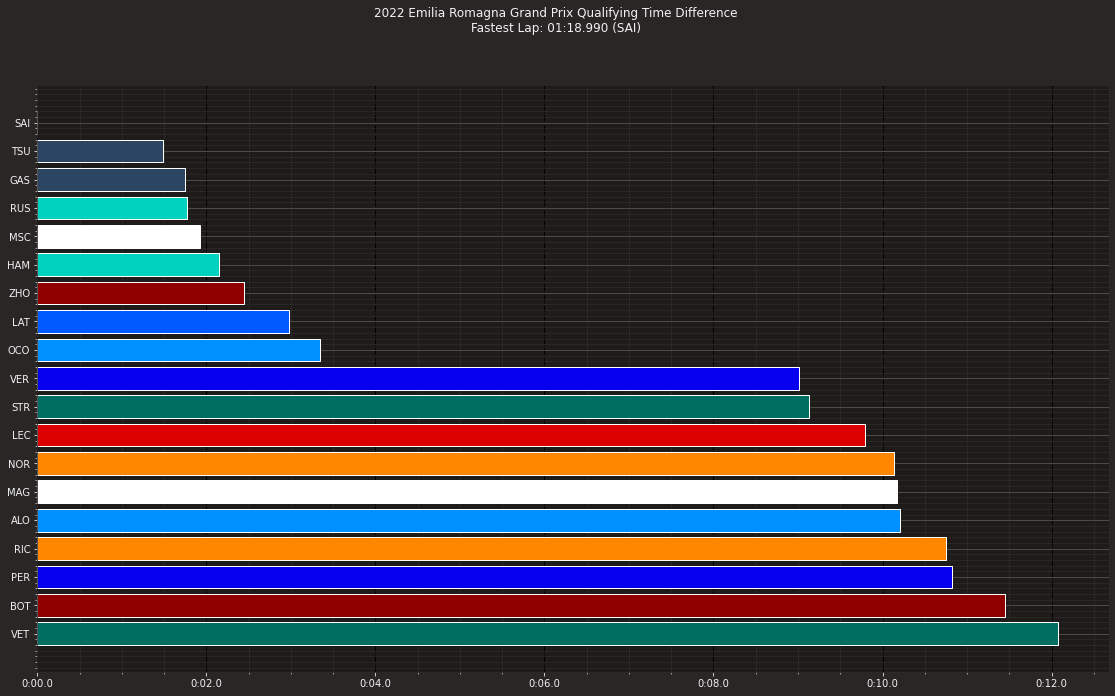

In [21]:
#Finally, plotting and titling
fig, ax = plt.subplots()
plt.gcf().set_size_inches(19.2,10.8)
ax.barh(fl.index, fl['LapTimeDiff'],color=tcol, edgecolor='white')
ax.set_yticks(fl.index)
ax.set_yticklabels(fl['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='-.', color='black', zorder=-1000)
lapstr = strftimedelta(pole['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Qualifying Time Difference\n"
             f"Fastest Lap: {lapstr} ({pole['Driver']})")
plt.savefig(f"{year} {circuit} Qualifying Time Difference.jpeg", dpi=100)

plt.show()

### Qualifying Pace Over Distance Analysis - Top 4 Drivers

In [22]:
#Getting the laps from all 4 drivers
llec=laps.pick_driver('LEC')
lver=laps.pick_driver('VER')
lnor=laps.pick_driver('NOR')
lmag=laps.pick_driver('MAG')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fnor=lnor.pick_fastest().get_telemetry().add_distance()
fmag=lmag.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
flec['Driver']='LEC'
fver['Driver']='VER'
fnor['Driver']='NOR'
fmag['Driver']='MAG'
#Getting everything in one dataframe
t1=flec.append(fver)
t2=t1.append(fnor)
telemetry=t2.append(fmag)

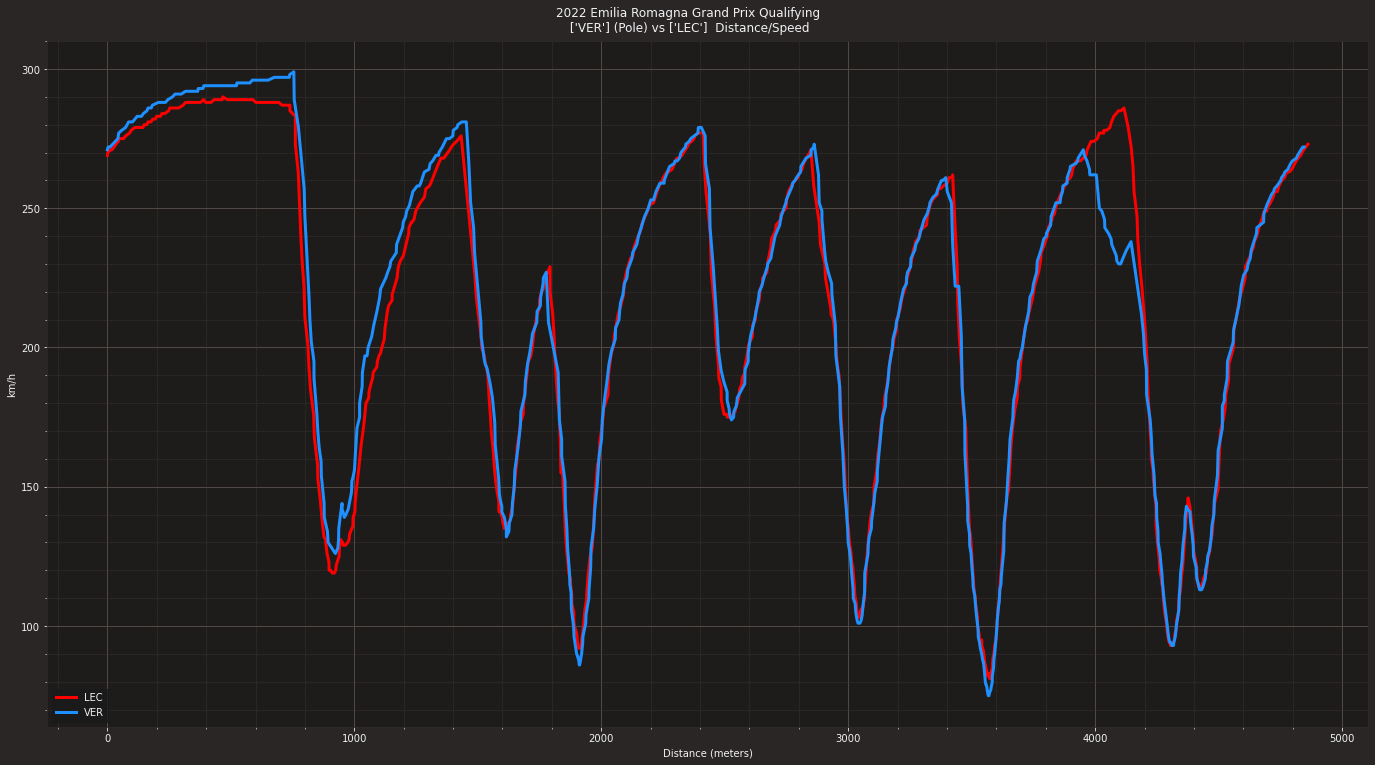

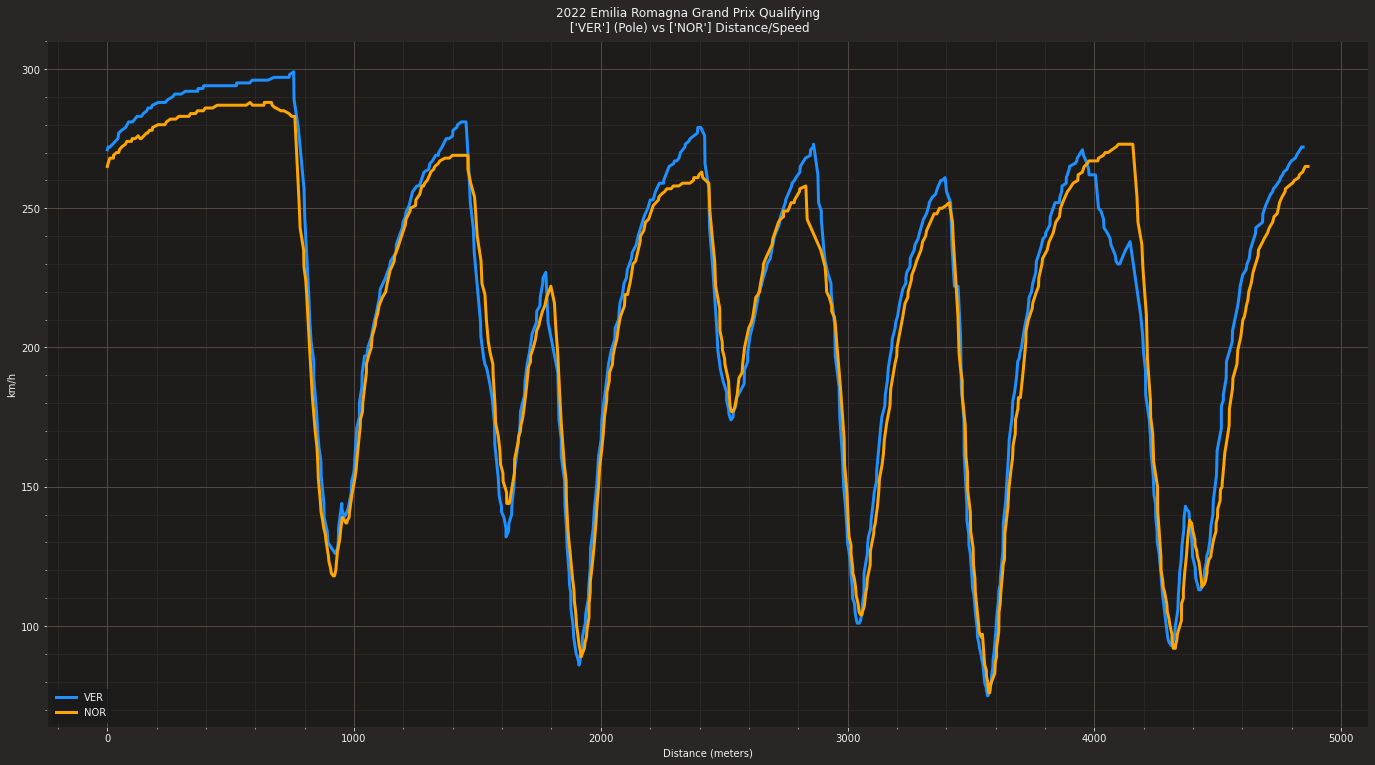

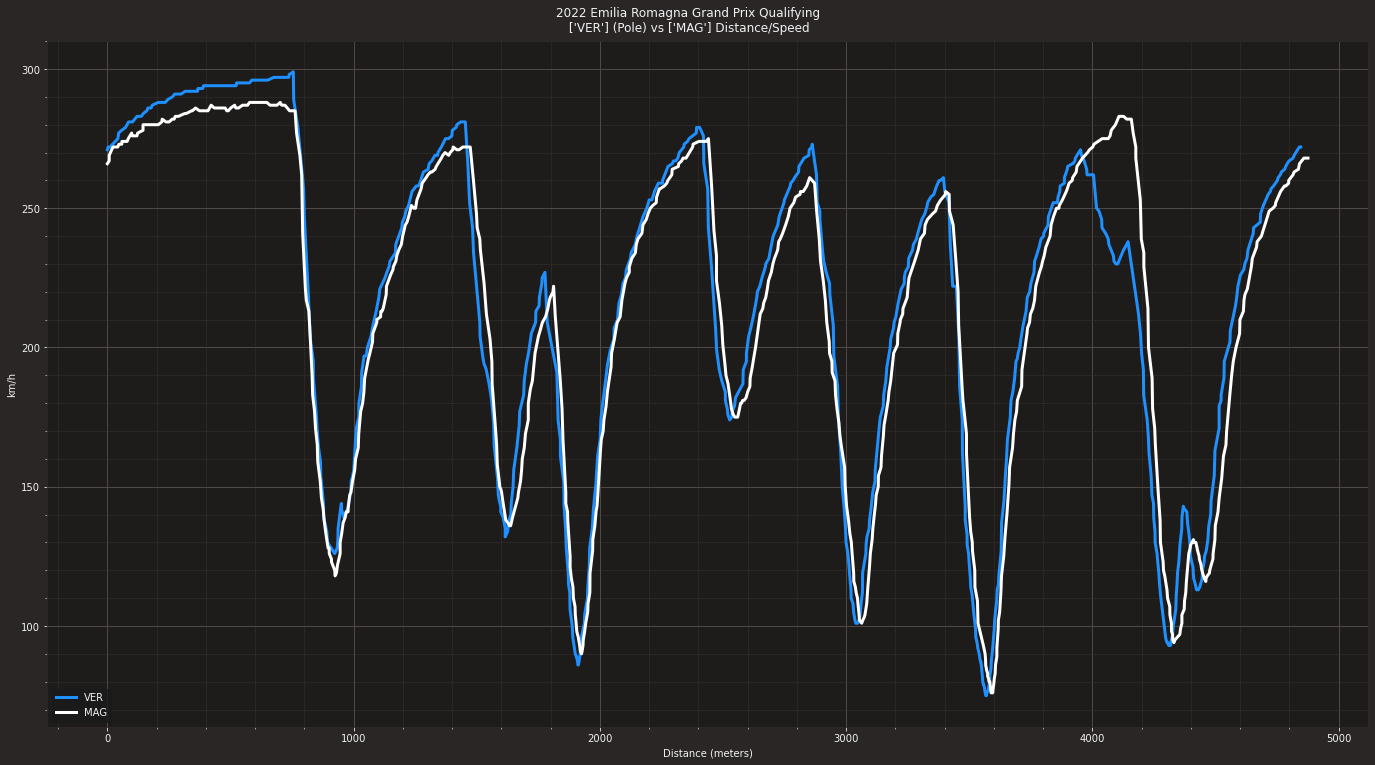

In [23]:
fig, ax = plt.subplots(1,tight_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n {fver['Driver'].unique()} (Pole) vs {flec['Driver'].unique()}  Distance/Speed")
plt.gcf().set_size_inches(19.2,10.8)
ax.plot(flec['Distance'], flec['Speed'], label='LEC',color='red', lw=3, ls='-')
ax.plot(fver['Distance'], fver['Speed'], label='VER',color='dodgerblue',lw=3, ls='-')
ax.set(ylabel='km/h', xlabel='Distance (meters)')
ax.legend(loc="lower left")
plt.savefig(f"{year} {circuit} {fver['Driver'].unique()} vs {flec['Driver'].unique()} Qualifying Distance-Speed.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(1,tight_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n {fver['Driver'].unique()} (Pole) vs {fnor['Driver'].unique()} Distance/Speed")
plt.gcf().set_size_inches(19.2,10.8)
ax.plot(fver['Distance'], fver['Speed'], label='VER',color='dodgerblue',lw=3, ls='-')
ax.plot(fnor['Distance'], fnor['Speed'], label='NOR',color='orange',lw=3, ls='-')
ax.set(ylabel='km/h', xlabel='Distance (meters)')
ax.legend(loc="lower left")
plt.savefig(f"{year} {circuit} {flec['Driver'].unique()} vs {fnor['Driver'].unique()} Qualifying Distance-Speed.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(1,tight_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n {fver['Driver'].unique()} (Pole) vs {fmag['Driver'].unique()} Distance/Speed")
plt.gcf().set_size_inches(19.2,10.8)
ax.plot(fver['Distance'], fver['Speed'], label='VER',color='dodgerblue',lw=3, ls='-')
ax.plot(fmag['Distance'], fmag['Speed'], label='MAG',color='white',lw=3, ls='-')
ax.set(ylabel='km/h', xlabel='Distance (meters)')
ax.legend(loc="lower left")
plt.savefig(f"{year} {circuit} {fver['Driver'].unique()} vs {fmag['Driver'].unique()} Qualifying Distance-Speed.jpeg",dpi=100)
plt.show()

In [24]:
# fig, ax = plt.subplots(2,tight_layout=True)
# fig.suptitle(f"{year} {circuit} Qualifying\n {flec['Driver']} (Pole) vs Top 4 Laptime/Speed Comparison")
# # plt.subplots_adjust(wspace=0.4,hspace=0.4)
# plt.gcf().set_size_inches(19.2,10.8)
# # ax[0].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# # ax[0].plot(fver['Time'], fver['Speed'], label='VER', color='blue')
# # ax[0].set(ylabel='km/h', xlabel='Laptime (seconds)')
# # ax[0].legend(loc="lower left")

# ax[0].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# ax[0].plot(fsai['Time'], fsai['Speed'], label='SAI', color='green')
# ax[0].set(ylabel='km/h', xlabel='Laptime (seconds)')
# ax[0].legend(loc="lower left")

# ax[1].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# ax[1].plot(fper['Time'], fper['Speed'], label='PER', color='white')
# ax[1].set(ylabel='km/h', xlabel='Laptime (seconds)')
# ax[1].legend(loc="lower left")

# plt.savefig(f"{year} {circuit} Qualifying Laptime-Speed Comparison.jpeg",dpi=100)
# plt.show()

### Comparing Teammates Qualifying

In [91]:
#Creating lap dataframes and sorting them by LapTime.

zhou=pd.DataFrame(quali.laps.pick_driver('ZHO').pick_fastest()).T
bot=pd.DataFrame(quali.laps.pick_driver('BOT').pick_fastest()).T
merge1=pd.merge(zhou,bot,how='outer')
fl1 = Laps(merge1).sort_values(by='LapTime').reset_index(drop=True)
fl1.dropna(axis=1)

schu=pd.DataFrame(quali.laps.pick_driver('MSC').pick_fastest()).T
magn=pd.DataFrame(quali.laps.pick_driver('MAG').pick_fastest()).T
merge2=pd.merge(schu,magn,how='outer')
fl2=Laps(merge2).sort_values(by='LapTime').reset_index(drop=True)
fl2.dropna(axis=1)

ricc=pd.DataFrame(quali.laps.pick_driver('RIC').pick_fastest()).T
norr=pd.DataFrame(quali.laps.pick_driver('NOR').pick_fastest()).T
merge3=pd.merge(ricc,norr,how='outer')
fl3=Laps(merge3).sort_values(by='LapTime').reset_index(drop=True)
fl3.dropna(axis=1)

vers=pd.DataFrame(quali.laps.pick_driver('VER').pick_fastest()).T
pere=pd.DataFrame(quali.laps.pick_driver('PER').pick_fastest()).T
merge4=pd.merge(vers,pere,how='outer')
fl4 = Laps(merge4).sort_values(by='LapTime').reset_index(drop=True)
fl4.dropna(axis=1)

lecl=pd.DataFrame(quali.laps.pick_driver('LEC').pick_fastest()).T
sain=pd.DataFrame(quali.laps.pick_driver('SAI').pick_fastest()).T
merge5=pd.merge(lecl,sain,how='outer')
fl5=Laps(merge5).sort_values(by='LapTime').reset_index(drop=True)
fl5.dropna(axis=1)

vett=pd.DataFrame(quali.laps.pick_driver('VET').pick_fastest()).T
stro=pd.DataFrame(quali.laps.pick_driver('STR').pick_fastest()).T
merge6=pd.merge(vett,stro,how='outer')
fl6=Laps(merge6).sort_values(by='LapTime').reset_index(drop=True)
fl6.dropna(axis=1)

russ=pd.DataFrame(quali.laps.pick_driver('RUS').pick_fastest()).T
hami=pd.DataFrame(quali.laps.pick_driver('HAM').pick_fastest()).T
merge7=pd.merge(russ,hami,how='outer')
fl7=Laps(merge7).sort_values(by='LapTime').reset_index(drop=True)
fl7.dropna(axis=1)

gasl=pd.DataFrame(quali.laps.pick_driver('GAS').pick_fastest()).T
tsun=pd.DataFrame(quali.laps.pick_driver('TSU').pick_fastest()).T
merge8=pd.merge(gasl,tsun,how='outer')
fl8=Laps(merge8).sort_values(by='LapTime').reset_index(drop=True)
fl8.dropna(axis=1)
# print(fl8)

alon=pd.DataFrame(quali.laps.pick_driver('ALO').pick_fastest()).T
ocon=pd.DataFrame(quali.laps.pick_driver('OCO').pick_fastest()).T
merge9=pd.merge(alon,ocon,how='outer')
fl9=Laps(merge9).sort_values(by='LapTime').reset_index(drop=True)
fl9.dropna(axis=1)

# albo=pd.DataFrame(quali.laps.pick_driver('ALB').pick_fastest()).T
# lati=pd.DataFrame(quali.laps.pick_driver('LAT').pick_fastest()).T
# merge10=pd.merge(albo,lati,how='outer')
# fl10=Laps(merge10).sort_values(by='LapTime').reset_index(drop=True)
# fl10.dropna(axis=1)

,Time,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
0,0 days 00:31:45.612000,31,0 days 00:01:22.338000,6.0,2.0,0 days 00:00:26.480000,0 days 00:00:28.024000,0 days 00:00:27.834000,0 days 00:30:49.754000,0 days 00:31:17.778000,0 days 00:31:45.612000,217.0,256.0,272.0,282.0,True,SOFT,7.0,False,0 days 00:30:23.274000,Alpine,OCO,1,True
1,0 days 01:33:21.595000,14,0 days 00:01:29.202000,23.0,6.0,0 days 00:00:28.212000,0 days 00:00:30.034000,0 days 00:00:30.956000,0 days 01:32:20.605000,0 days 01:32:50.639000,0 days 01:33:21.595000,209.0,250.0,265.0,268.0,True,INTERMEDIATE,4.0,True,0 days 01:31:52.393000,Alpine,ALO,1,True


In [92]:
best1=fl1.pick_fastest()
fl1['LapTimeDiff']=fl1['LapTime']-best1['LapTime']
# print(fl1[['Driver', 'LapTime', 'LapTimeDiff']])

best2=fl2.pick_fastest()
fl2['LapTimeDiff']=fl2['LapTime']-best2['LapTime']
# print(fl2[['Driver', 'LapTime', 'LapTimeDiff']])

best3=fl3.pick_fastest()
fl3['LapTimeDiff']=fl3['LapTime']-best3['LapTime']
# print(fl3[['Driver', 'LapTime', 'LapTimeDiff']])

best4=fl4.pick_fastest()
fl4['LapTimeDiff']=fl4['LapTime']-best4['LapTime']
# print(fl4[['Driver', 'LapTime', 'LapTimeDiff']])

best5=fl5.pick_fastest()
fl5['LapTimeDiff']=fl5['LapTime']-best5['LapTime']
# print(fl5[['Driver', 'LapTime', 'LapTimeDiff']])

best6=fl6.pick_fastest()
fl6['LapTimeDiff']=fl6['LapTime']-best6['LapTime']
print(fl6[['Driver', 'LapTime', 'LapTimeDiff']])

best7=fl7.pick_fastest()
fl7['LapTimeDiff']=fl7['LapTime']-best7['LapTime']
# print(fl7[['Driver', 'LapTime', 'LapTimeDiff']])

best8=fl8.pick_fastest()
fl8['LapTimeDiff']=fl8['LapTime']-best8['LapTime']
# print(fl8[['Driver', 'LapTime', 'LapTimeDiff']])

best9=fl9.pick_fastest()
fl9['LapTimeDiff']=fl9['LapTime']-best9['LapTime']
# print(fl9[['Driver', 'LapTime', 'LapTimeDiff']])

# best10=fl10.pick_fastest()
# fl10['LapTimeDiff']=fl10['LapTime']-best10['LapTime']
# # print(fl10[['Driver', 'LapTime', 'LapTimeDiff']])

# tcol1 = list()
# for index, lap in fl1.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol1.append(color)

# tcol2 = list()
# for index, lap in fl2.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol2.append(color)
    
# tcol3 = list()
# for index, lap in fl3.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol3.append(color)

# tcol4 = list()
# for index, lap in fl4.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol4.append(color)

# tcol5 = list()
# for index, lap in fl5.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol5.append(color)

# # tcol6 = list()
# # for index, lap in fl6.iterlaps():
# #     color = ff1.plotting.team_color(lap['Team'])
# #     tcol6.append(color)

# tcol7 = list()
# for index, lap in fl7.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol7.append(color)
    
# tcol8 = list()
# for index, lap in fl8.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol8.append(color)

# tcol9 = list()
# for index, lap in fl9.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol9.append(color)

# tcol10 = list()
# for index, lap in fl10.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol10.append(color)
    

dcol1 = list()
for index, lap in fl1.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol1.append(color)

dcol2 = list()
for index, lap in fl2.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol2.append(color)
    
dcol3 = list()
for index, lap in fl3.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol3.append(color)
    
dcol4 = list()
for index, lap in fl4.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol4.append(color)

dcol5 = list()
for index, lap in fl5.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol5.append(color)

dcol6 = list()
for index, lap in fl6.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol6.append(color)

dcol7 = list()
for index, lap in fl7.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol7.append(color)

dcol8 = list()
for index, lap in fl8.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol8.append(color)

dcol9 = list()
for index, lap in fl9.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol9.append(color)

# dcol10 = list()
# for index, lap in fl10.iterlaps():
#     color = ff1.plotting.driver_color(lap['Driver'])
#     dcol10.append(color)

  Driver                LapTime            LapTimeDiff
0    STR 0 days 00:01:28.119000        0 days 00:00:00
1    VET 0 days 00:01:31.062000 0 days 00:00:02.943000


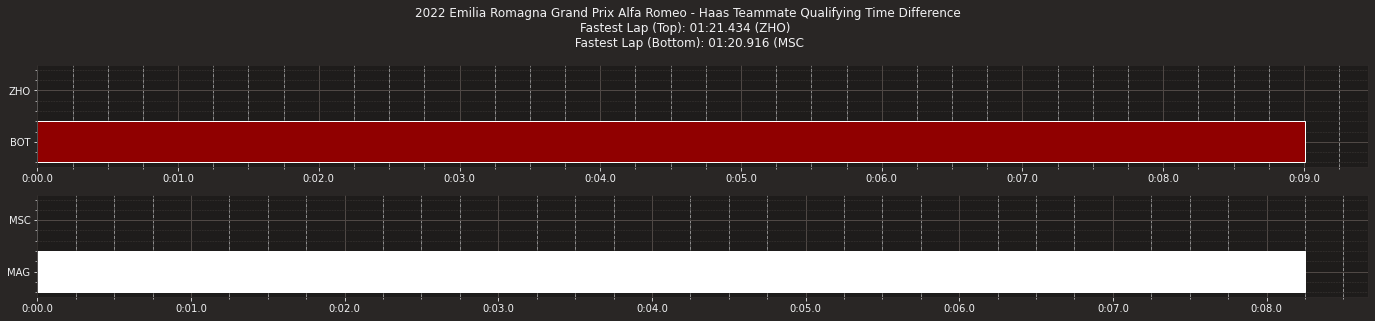

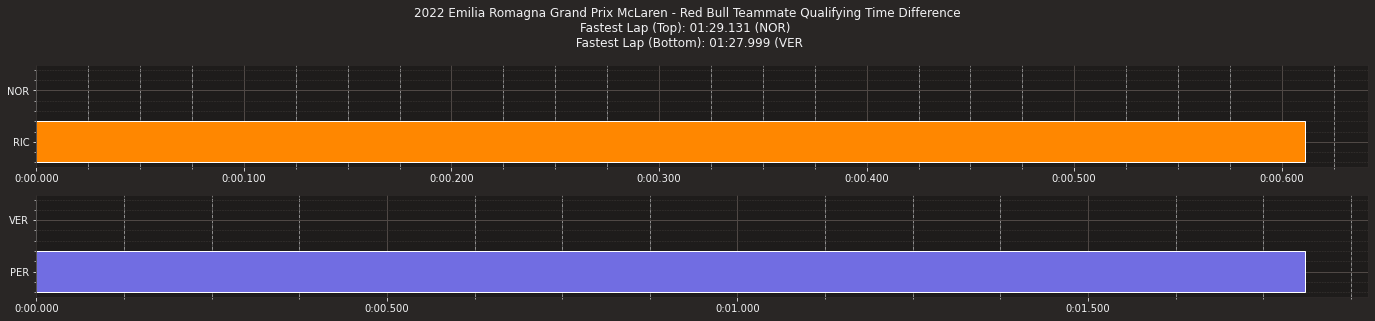

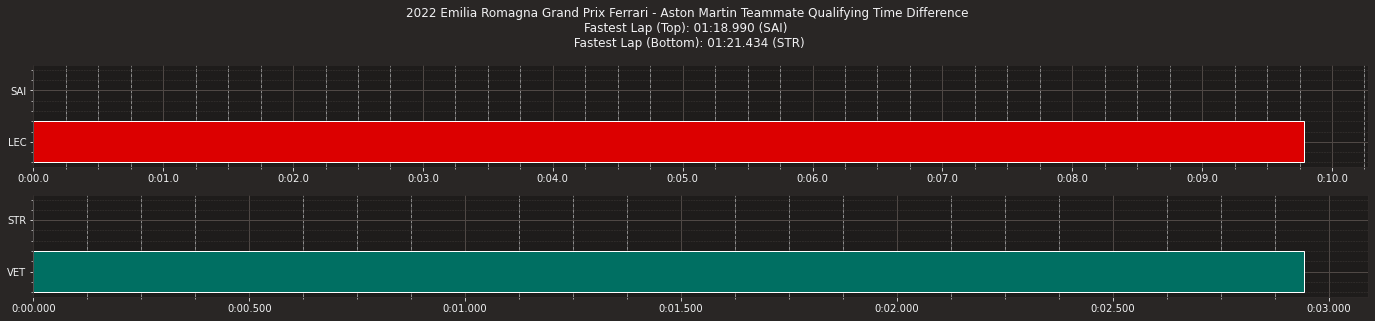

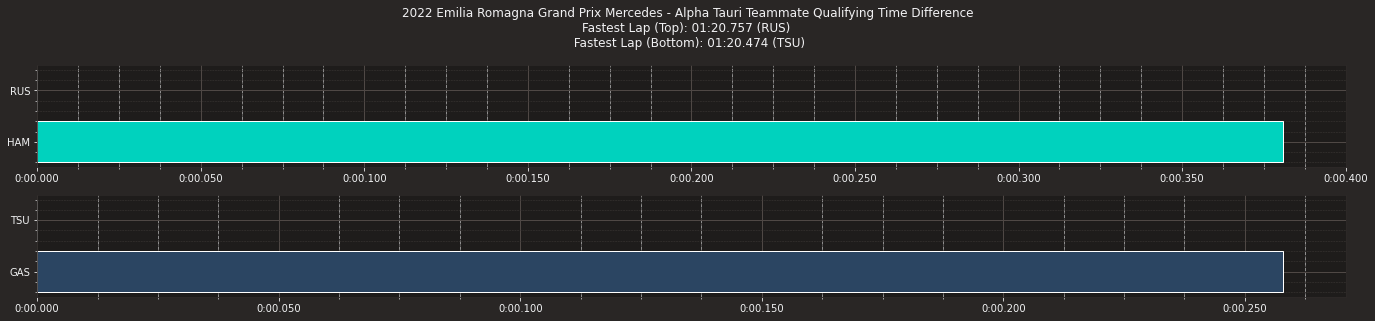

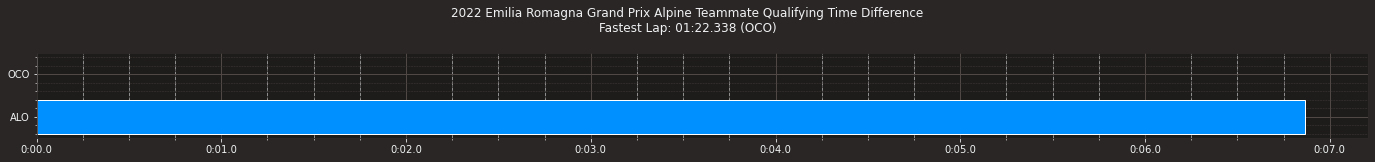

In [94]:
fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl1.index, fl1['LapTimeDiff'],color=dcol1, edgecolor='white')
ax[0].set_yticks(fl1.index)
ax[0].set_yticklabels(fl1['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr1 = strftimedelta(best1['LapTime'], '%m:%s.%ms')
ax[1].barh(fl2.index, fl2['LapTimeDiff'],color=dcol2, edgecolor='white')
ax[1].set_yticks(fl2.index)
ax[1].set_yticklabels(fl2['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr2 = strftimedelta(best2['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Alfa Romeo - Haas Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr1} ({best1['Driver']}) \n Fastest Lap (Bottom): {lapstr2} ({best2['Driver']}")
plt.savefig(f"{year} {circuit} Alfa Romeo - Haas Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl3.index, fl3['LapTimeDiff'],color=dcol3, edgecolor='white')
ax[0].set_yticks(fl3.index)
ax[0].set_yticklabels(fl3['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr3 = strftimedelta(best3['LapTime'], '%m:%s.%ms')
ax[1].barh(fl4.index, fl4['LapTimeDiff'],color=dcol4, edgecolor='white')
ax[1].set_yticks(fl4.index)
ax[1].set_yticklabels(fl4['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr4 = strftimedelta(best4['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} McLaren - Red Bull Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr3} ({best3['Driver']}) \n Fastest Lap (Bottom): {lapstr4} ({best4['Driver']}")
plt.savefig(f"{year} {circuit} McLaren - Red Bull Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl5.index, fl5['LapTimeDiff'],color=dcol5, edgecolor='white')
ax[0].set_yticks(fl5.index)
ax[0].set_yticklabels(fl5['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr5 = strftimedelta(best5['LapTime'], '%m:%s.%ms')
ax[1].barh(fl6.index, fl6['LapTimeDiff'],color=dcol6, edgecolor='white')
ax[1].set_yticks(fl6.index)
ax[1].set_yticklabels(fl6['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr6 = strftimedelta(best1['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Ferrari - Aston Martin Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr5} ({best5['Driver']}) \n Fastest Lap (Bottom): {lapstr6} ({best6['Driver']})")
plt.savefig(f"{year} {circuit} Ferrari - Aston Martin Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl7.index, fl7['LapTimeDiff'],color=dcol7, edgecolor='white')
ax[0].set_yticks(fl7.index)
ax[0].set_yticklabels(fl7['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr7 = strftimedelta(best7['LapTime'], '%m:%s.%ms')
ax[1].barh(fl8.index, fl8['LapTimeDiff'],color=dcol8, edgecolor='white')
ax[1].set_yticks(fl8.index)
ax[1].set_yticklabels(fl8['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr8 = strftimedelta(best8['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{year} {circuit} Mercedes - Alpha Tauri Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr7} ({best7['Driver']}) \n Fastest Lap (Bottom): {lapstr8} ({best8['Driver']})")
plt.savefig(f"{year} {circuit} Mercedes - Alpha Tauri Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(1,tight_layout=True)
plt.gcf().set_size_inches(19.2,2.25)
ax.barh(fl9.index, fl9['LapTimeDiff'],color=dcol9, edgecolor='white')
ax.set_yticks(fl9.index)
ax.set_yticklabels(fl9['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr9 = strftimedelta(best9['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{year} {circuit} Alpine Teammate Qualifying Time Difference\n"
             f"Fastest Lap: {lapstr9} ({best9['Driver']})")
plt.savefig(f"{year} {circuit} Alpine Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

# Race Analysis

In [32]:
year=2022
circuit='Emilia Romagna Grand Prix'

race=ff1.get_session(year,circuit,'R')
lapsr=race.load_laps(with_telemetry=True)

C:\Users\EDGAR\anaconda3\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', 

In [33]:
# race.results[:4]

## Average Laptime Over a Stint

In [34]:
filt=((lapsr['Compound']=='MEDIUM')& (lapsr['Driver']=='LEC'))
filt2=((lapsr['Compound']=='MEDIUM')& (lapsr['Driver']=='VER'))
medium_stints_lec=lapsr.loc[filt,['Compound','Stint','Driver','LapTime']]
medium_stints_ver=lapsr.loc[filt2,['Compound','Stint','Driver','LapTime']]

In [35]:
ave=sum(medium_stints_lec['LapTime'],datetime.timedelta())/ len(medium_stints_lec['LapTime'])
ave2=sum(medium_stints_ver['LapTime'],datetime.timedelta())/ len(medium_stints_ver['LapTime'])
avediff=ave-ave2
print(f"Charles average lap on Mediums: {ave}. Max average lap on Mediums: {ave2}. Here is the difference between the two average laps: {avediff}")

Charles average lap on Mediums: 0 days 00:01:22.738466666. Max average lap on Mediums: 0 days 00:01:22.337437500. Here is the difference between the two average laps: 0 days 00:00:00.401029166


## Fastest Speed on Each Race Tyre

In [36]:
meds=lapsr.loc[(lapsr['Compound']=='MEDIUM'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
filt3=(meds['SpeedST']==max(meds['SpeedST']))
fmeds=pd.DataFrame(meds.loc[filt3,:])

softs=lapsr.loc[(lapsr['Compound']=='SOFT'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
filt4=(softs['SpeedST']==max(softs['SpeedST']))
fsoft=pd.DataFrame(softs.loc[filt4,:])

hards=lapsr.loc[(lapsr['Compound']=='HARD'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
filt5=(hards['SpeedST']==max(hards['SpeedST']))
fhard=pd.DataFrame(hards.loc[filt5,:])

inters=lapsr.loc[(lapsr['Compound']=='INTERMEDIATE'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
filt6=(inters['SpeedST']==max(inters['SpeedST']))
fint=pd.DataFrame(inters.loc[filt6,:])
# fint,fhard,fmeds,fsoft
#Fastest on Inters was 284kmh from LEC, Hards was 285kmh from RIC, Meds was 297kmh from ALB, Softs was 296kmh from PER. 

## Fastest Tyre Over a Stint

In [37]:
'''Information I need:
- Need LapTime for each lap
- Need to get the Stints I want 
- Need to either calculate the average LapTime for that particular Stint across the whole grid, or look at it lap-by-lap.
    - I'll do average LapTime first since I already know how to do that.
- Firstly I'm going to calculate the fastest tyre for each stint (1,2,3,4), and then I'll try to aggregate.
'''
#Tyres used in Stint 1:
s1=s1.sort_values('LapTime')
s1tyres=lapsr.loc[lapsr['Stint']==1,['Compound']]
print(f"The tyres used in Stint 1 were:{s1tyres['Compound'].unique()}.")

#Average Stint 1 LapTime:
f1=((lapsr['Stint']==1)& (lapsr['LapTime'].notna()))
s1=lapsr.loc[f1,['LapTime','Compound','Stint','Driver','Team']]   
s1['Avg_Stint_LapTime']=sum(s1['LapTime'],datetime.timedelta())/ len(s1['LapTime'])
s1_avg_time=s1['Avg_Stint_LapTime'].to_list()
print(f"The average laptime for the first stint of the {year} {circuit} was {s1_avg_time[0]}.")

#In this second stint tyre strategies should start to differ. Let's see if that's the case.
s2tyres=lapsr.loc[lapsr['Stint']==2,['Compound']]
print(f"The tyres used in Stint 2 were:{s2tyres['Compound'].unique()}.")

#Drivers that pitted once:
f2=(lapsr['Stint']==2)&((lapsr['Compound']=='SOFT')| (lapsr['Compound']=='MEDIUM'))
s3=lapsr.loc[f2,['Driver','LapTime','Compound','SpeedST','TyreLife']].sort_values('LapTime')
print(f"These were the drivers on that switched tyres 1 time: {s2['Driver'].unique()}.")

#Average Stint 2 LapTimes:
f2inter=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='INTERMEDIATE'))
s2inter=pd.DataFrame(lapsr.loc[f2inter,['LapTime','Compound','Stint','Driver','Team']])
s2inter['Avg_Stint_LapTime']=sum(s2inter['LapTime'],datetime.timedelta())/ len(s2inter['LapTime'])

f2medium=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
s2medium=pd.DataFrame(lapsr.loc[f2medium,['LapTime','Compound','Stint','Driver','Team']])
s2medium['Avg_Stint_LapTime']=sum(s2medium['LapTime'],datetime.timedelta())/ len(s2medium['LapTime'])

#Stint 2 Average LapTime Difference:
s2int=s2inter['Avg_Stint_LapTime'].to_list()
s2meds=s2medium['Avg_Stint_LapTime'].to_list()
s2time_diff=s2int[1]-s2meds[1]
print(f"The average laptime difference between Inters and Mediums in the second stint of the {year} {circuit} was: {s2time_diff} seconds.\n Average laptime on Inters was {s2int[0]} \n Average laptime on Mediums was {s2meds[0]}")

#Tyres used in Stint 3:
s3tyres=lapsr.loc[lapsr['Stint']==3,['Compound']]
print(f"The tyres used in Stint 3 were:{s3tyres['Compound'].unique()}.")

#Drivers that pitted twice:
f3=(lapsr['Stint']<=3)&((lapsr['Compound']=='SOFT')| (lapsr['Compound']=='MEDIUM'))
s3=lapsr.loc[f3,['Driver','LapTime','Compound','SpeedST','TyreLife']].sort_values('LapTime')
print(f"These were the drivers on that switched tyres 2 times: {s3['Driver'].unique()}.")

#Average Stint 3 LapTimes:
f3medium=((lapsr['Stint']==3)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
s3medium=pd.DataFrame(lapsr.loc[f3medium,['LapTime','Compound','Stint','Driver','Team']])
s3medium['Avg_Stint_LapTime']=sum(s3medium['LapTime'],datetime.timedelta())/ len(s3medium['LapTime'])

f3soft=((lapsr['Stint']==3)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='SOFT'))
s3soft=pd.DataFrame(lapsr.loc[f3soft,['LapTime','Compound','Stint','Driver','Team']])
s3soft['Avg_Stint_LapTime']=sum(s3soft['LapTime'],datetime.timedelta())/ len(s3soft['LapTime'])

#Stint 3 Average LapTime Difference:
s3med=s3medium['Avg_Stint_LapTime'].to_list()
s3sof=s3soft['Avg_Stint_LapTime'].to_list()
s3time_diff=s3med[1]-s3sof[1]
print(f"The average laptime difference between Mediums and Softs in the third stint of the {year} {circuit} was: {s3time_diff} seconds. \n Average laptime on Mediums was {s3med[0]} \n Average laptime on Softs was {s3sof[0]}")


#Are there more stints?
lapsr['Stint'].unique()
#Since there are 4 stints, let's see which tyres were used again!
s4tyres=lapsr.loc[lapsr['Stint']==4,['Compound']]
# s3tyres['Compound'].unique()
print(f"The tyres used in Stint 4 were:{s4tyres['Compound'].unique()}.")

#Drivers that pitted thrice:
f4=(lapsr['Stint']==4)&((lapsr['Compound']=='SOFT')| (lapsr['Compound']=='HARD'))
s4=lapsr.loc[f4,['Driver','LapTime','Compound','SpeedST','TyreLife']].sort_values('LapTime')
print(f"These were the drivers that switched tyres 3 times: {s4['Driver'].unique()}.")

#Average Stint 4 LapTimes:
f4soft=((lapsr['Stint']==4)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='SOFT'))
s4soft=pd.DataFrame(lapsr.loc[f4soft,['LapTime','Compound','Stint','Driver','Team']])
s4soft['Avg_Stint_LapTime']=sum(s4soft['LapTime'],datetime.timedelta())/ len(s4soft['LapTime'])

f4hard=((lapsr['Stint']==4)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='HARD'))
s4hard=pd.DataFrame(lapsr.loc[f4hard,['LapTime','Compound','Stint','Driver','Team']])
s4hard['Avg_Stint_LapTime']=sum(s4hard['LapTime'],datetime.timedelta())/ len(s4hard['LapTime'])

#Stint 4 Average LapTime Difference:
s4har=s4hard['Avg_Stint_LapTime'].to_list()
s4sof=s4soft['Avg_Stint_LapTime'].to_list()
s4time_diff=s4har[0]-s4sof[0]
print(f"The average laptime difference between Hards and Softs in the third stint of the {year} {circuit} was: {s4time_diff} seconds.\n Average laptime on Hards was {s4har[0]} \n Average laptime on Softs was {s4sof[0]}")

The tyres used in Stint 1 were:['INTERMEDIATE'].
The average laptime for the first stint of the 2022 Emilia Romagna Grand Prix was 0 days 00:01:41.609783882.
The tyres used in Stint 2 were:['MEDIUM' 'INTERMEDIATE'].
These were the drivers on that switched tyres 1 time: ['VER'].
The average laptime difference between Inters and Mediums in the second stint of the 2022 Emilia Romagna Grand Prix was: 0 days 00:00:18.353654371 seconds.
 Average laptime on Inters was 0 days 00:01:41.525290322 
 Average laptime on Mediums was 0 days 00:01:23.171635951
The tyres used in Stint 3 were:['SOFT' 'MEDIUM'].
These were the drivers on that switched tyres 2 times: ['VER' 'LEC' 'PER' 'MSC' 'TSU' 'BOT' 'NOR' 'RUS' 'VET' 'MAG' 'ZHO' 'LAT'
 'HAM' 'GAS' 'STR' 'ALB' 'OCO' 'RIC'].
The average laptime difference between Mediums and Softs in the third stint of the 2022 Emilia Romagna Grand Prix was: 0 days 00:00:01.548870027 seconds. 
 Average laptime on Mediums was 0 days 00:01:24.399793103 
 Average laptime o

### Fastest Minisectors in the race

In [38]:
#Getting the laps from all 4 drivers
llec=lapsr.pick_driver('LEC')
# lrus=lapsr.pick_driver('RUS')
lham=lapsr.pick_driver('HAM')
lper=lapsr.pick_driver('PER')
#Getting telemetry data from drihams
flec=llec.pick_fastest().get_telemetry().add_distance()
fham=lham.pick_fastest().get_telemetry().add_distance()
# frus=lrus.pick_fastest().get_telemetry().add_distance()
fper=lper.pick_fastest().get_telemetry().add_distance()
#Creating Driham column
flec['Driver']='LEC'
# frus['Driver']='RUS'
fham['Driver']='HAM'
fper['Driver']='PER'
#Getting everything in one dataframe
t1=flec.append(fham)
telemetry=t1.append(fper)
# telemetry=t2.append(frus)

In [39]:
#Creating the minisectors (doing 30 - 10 per sector)
nmini=30
#Grabbing circuit distance
cdist=max(telemetry['Distance'])
#Dividing circuit distance by number of minisectors to have our minisector distance
minilen=cdist/nmini
#Calculating distances at which the next minisector begins
minis=[0]
for b in range(0,(nmini-1)):
    minis.append(minilen*(b+1))
#Assigning every row in the dataset to a minisector, so we always know which minisector the cars were located in.
telemetry['Minisector']=telemetry['Distance'].apply(
    lambda dist:(
        int((dist // minilen)+1)))

In [40]:
#Finding the fastest driver per minisector so we can color it in the minisector map
avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
fastest = avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
fastest = fastest[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

In [41]:
fastest['Fastest_Driver'].unique()
#3 drivers had a fastest minisector
# fastest['Fastest_Driver']=='LEC'

array(['HAM', 'PER', 'LEC'], dtype=object)

In [42]:
# Fastest driver per minisector + telemetry
telemetry = telemetry.merge(fastest, on=['Minisector'])

# Ordering by distance
telemetry = telemetry.sort_values(by=['Distance'])

# Converting driver name to integer
telemetry.loc[telemetry['Fastest_Driver'] == 'LEC', 'Fastest_Driver_int'] = 1
telemetry.loc[telemetry['Fastest_Driver'] == 'HAM', 'Fastest_Driver_int'] = 2
telemetry.loc[telemetry['Fastest_Driver'] == 'PER', 'Fastest_Driver_int'] = 3

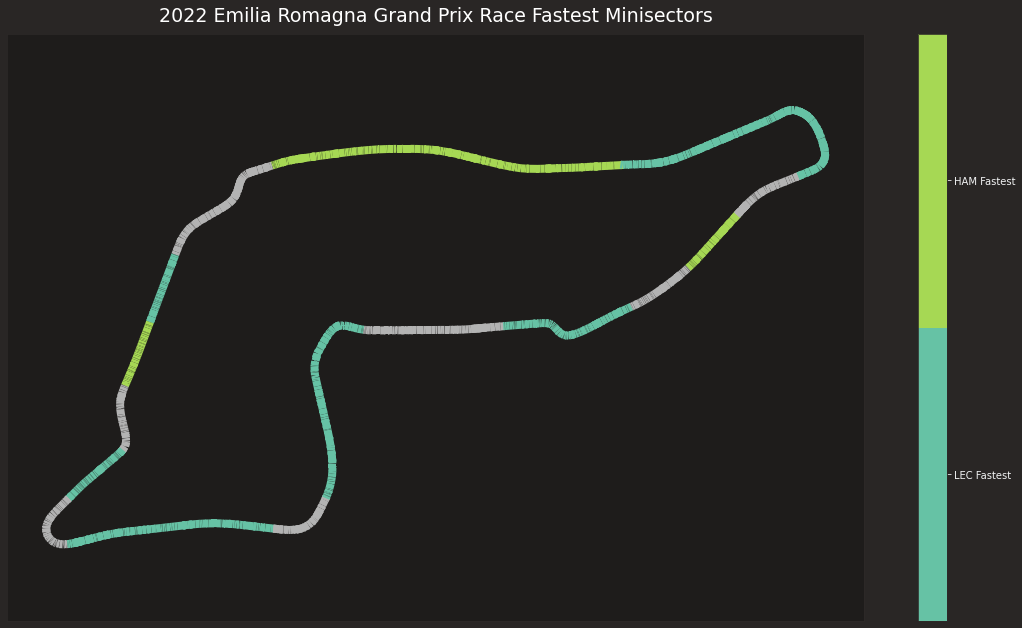

In [43]:
# Finally, plotting.
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_Driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Set2', 3)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(8)


plt.gca().add_collection(lc_comp)
plt.gcf().set_size_inches(19.2,10.8)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f'{year} {circuit} Race Fastest Minisectors',color='white')
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 5.5))
cbar.set_ticklabels(['LEC Fastest', 'HAM Fastest','PER Fastest'])

plt.savefig(f"{year} {circuit} Race Minisectors.jpeg", dpi=100)

plt.show()

### Race Pace Comparison - Norris vs. Perez

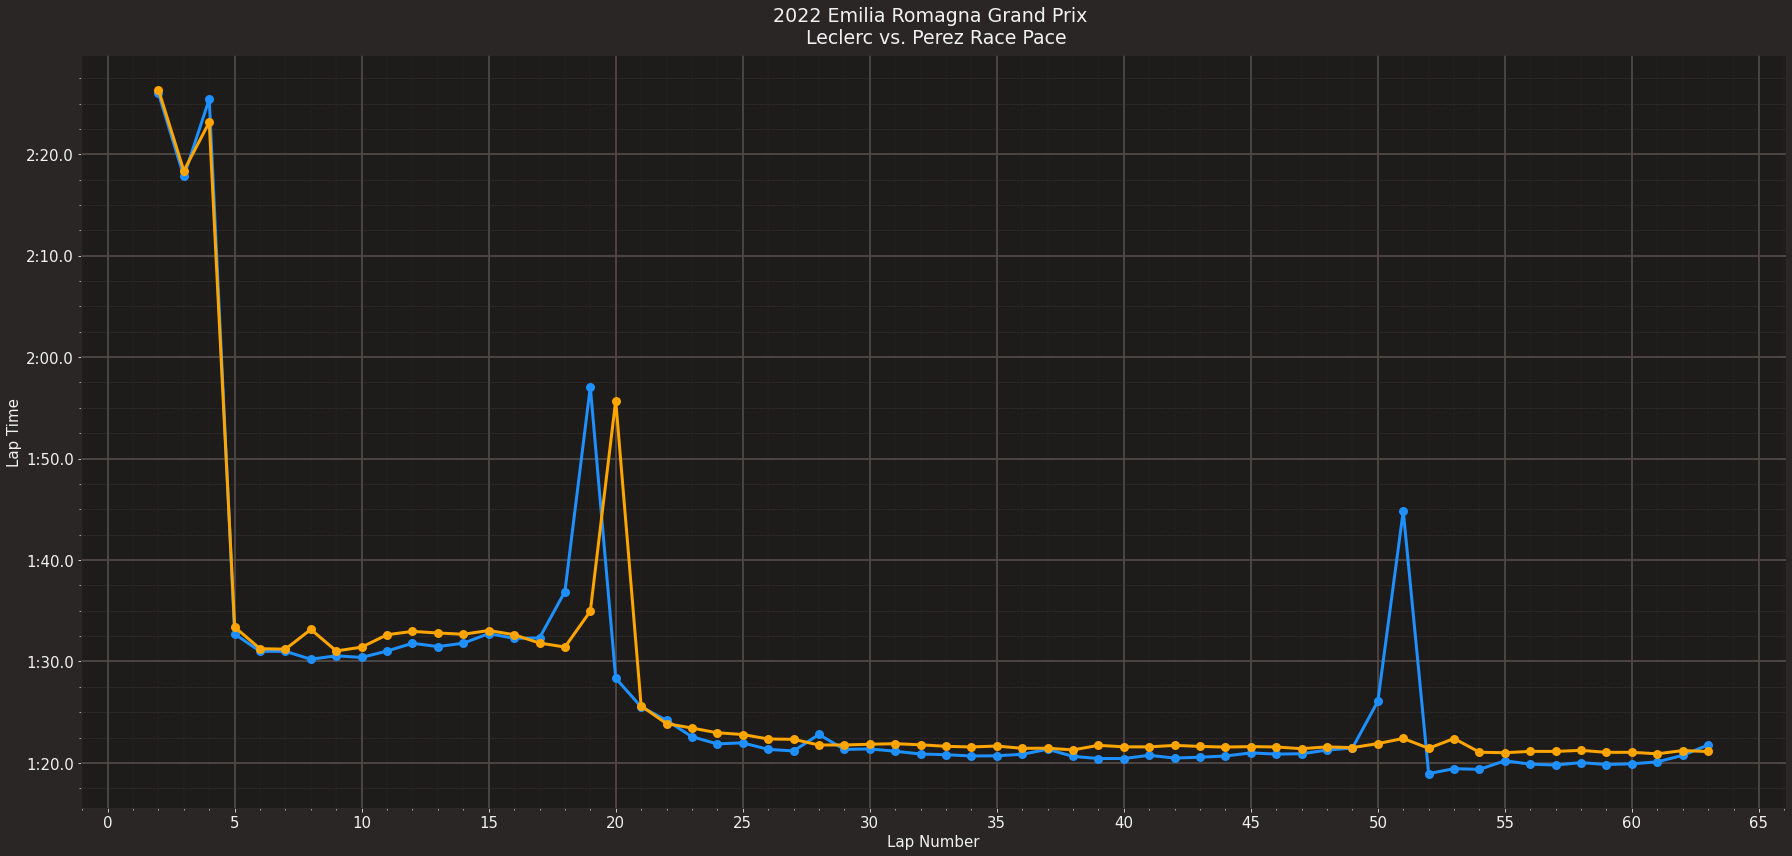

In [84]:
per = lapsr.pick_driver('PER')
nor = lapsr.pick_driver('NOR')
fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(25,12.0)
plt.tick_params(axis='both', which='major', labelsize=15, grid_alpha=0.9, grid_ls='-',grid_lw=2)
plt.tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax.plot(per['LapNumber'], per['LapTime'], color='dodgerblue',linewidth=3,ls='-',marker='o',markersize=3,markerfacecolor='dodgerblue', markeredgecolor='dodgerblue', markeredgewidth=6)
ax.plot(nor['LapNumber'], nor['LapTime'], color='orange',linewidth=3,ls='-',marker='o',markersize=3,markerfacecolor='orange', markeredgecolor='orange', markeredgewidth=6)
ax.set_title(f"{year} {circuit} \n Leclerc vs. Perez Race Pace")
ax.set_xticks(range(0,70,5))
ax.set_xlabel("Lap Number",fontsize=15)
ax.set_ylabel("Lap Time",fontsize=15)
plt.savefig(f"{year} {circuit} Norris vs Perez Race Pace Comparison.jpeg",dpi=100)
plt.show()

### Race Pace Comparison Between Teammates

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:32:07.986000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:32:24.513000,Finished,18.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,3.0,5.0,NaT,NaT,NaT,0 days 01:32:42.820000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,11.0,NaT,NaT,NaT,0 days 01:32:50.492000,Finished,12.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,5.0,7.0,NaT,NaT,NaT,0 days 01:32:51.167000,Finished,10.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,6.0,2.0,NaT,NaT,NaT,0 days 01:33:04.058000,Finished,8.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,7.0,12.0,NaT,NaT,NaT,0 days 01:33:09.096000,Finished,6.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,8.0,13.0,NaT,NaT,NaT,0 days 01:33:18.878000,Finished,4.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,9.0,8.0,NaT,NaT,NaT,0 days 01:33:23.246000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,10.0,15.0,NaT,NaT,NaT,NaT,+1 Lap,1.0


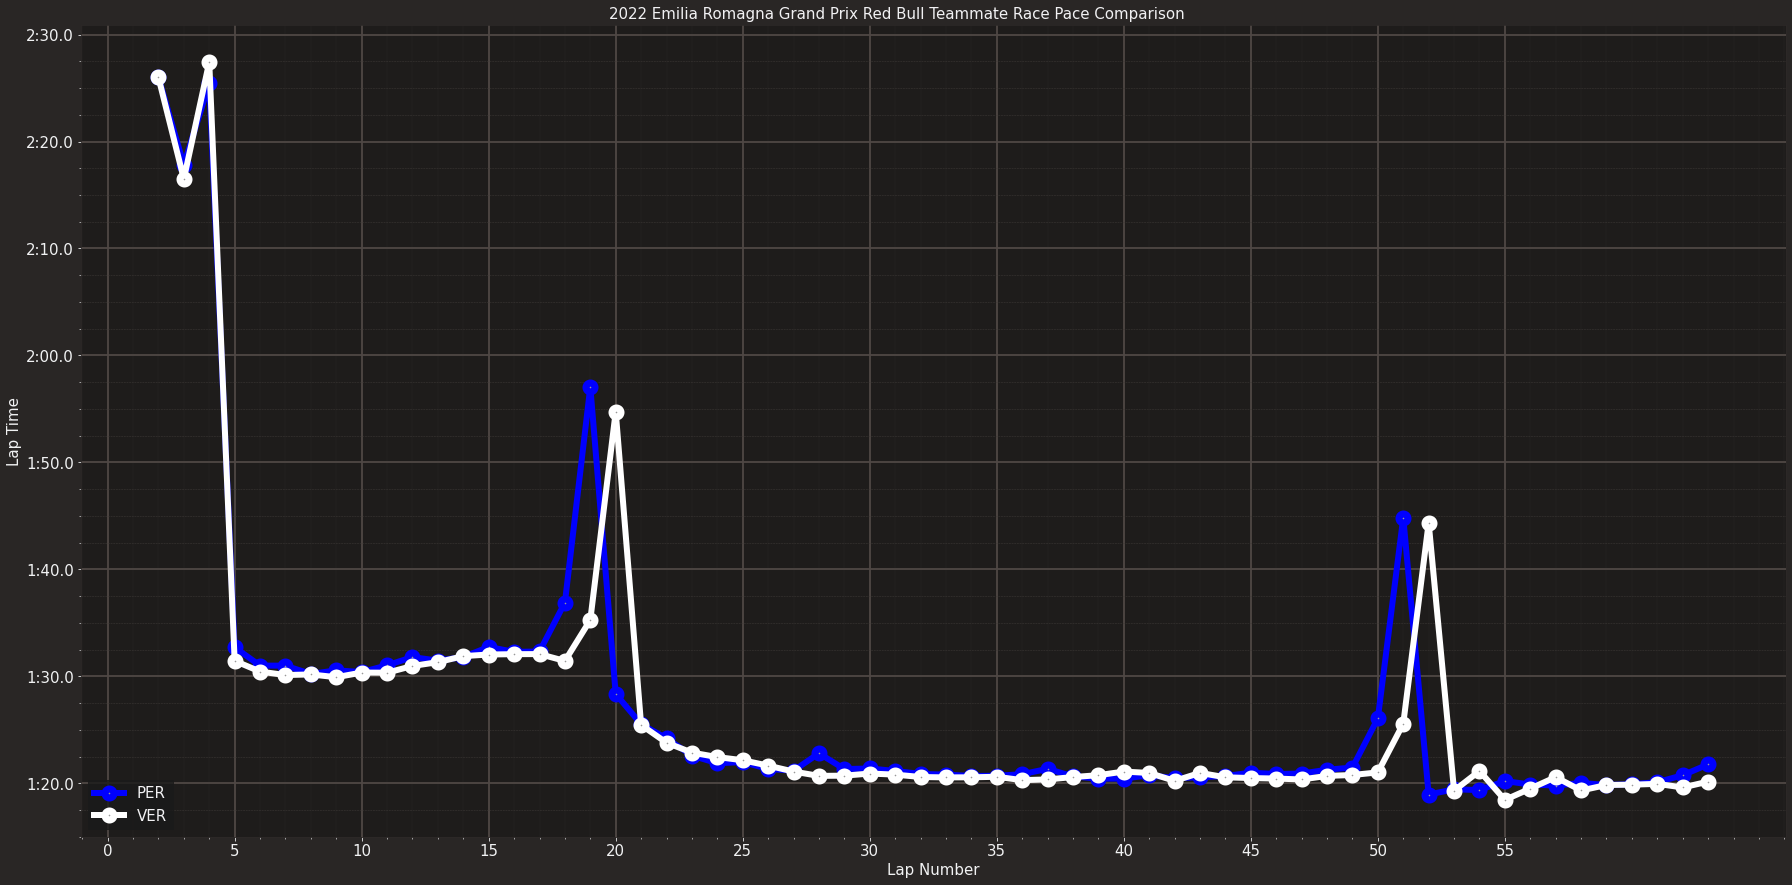

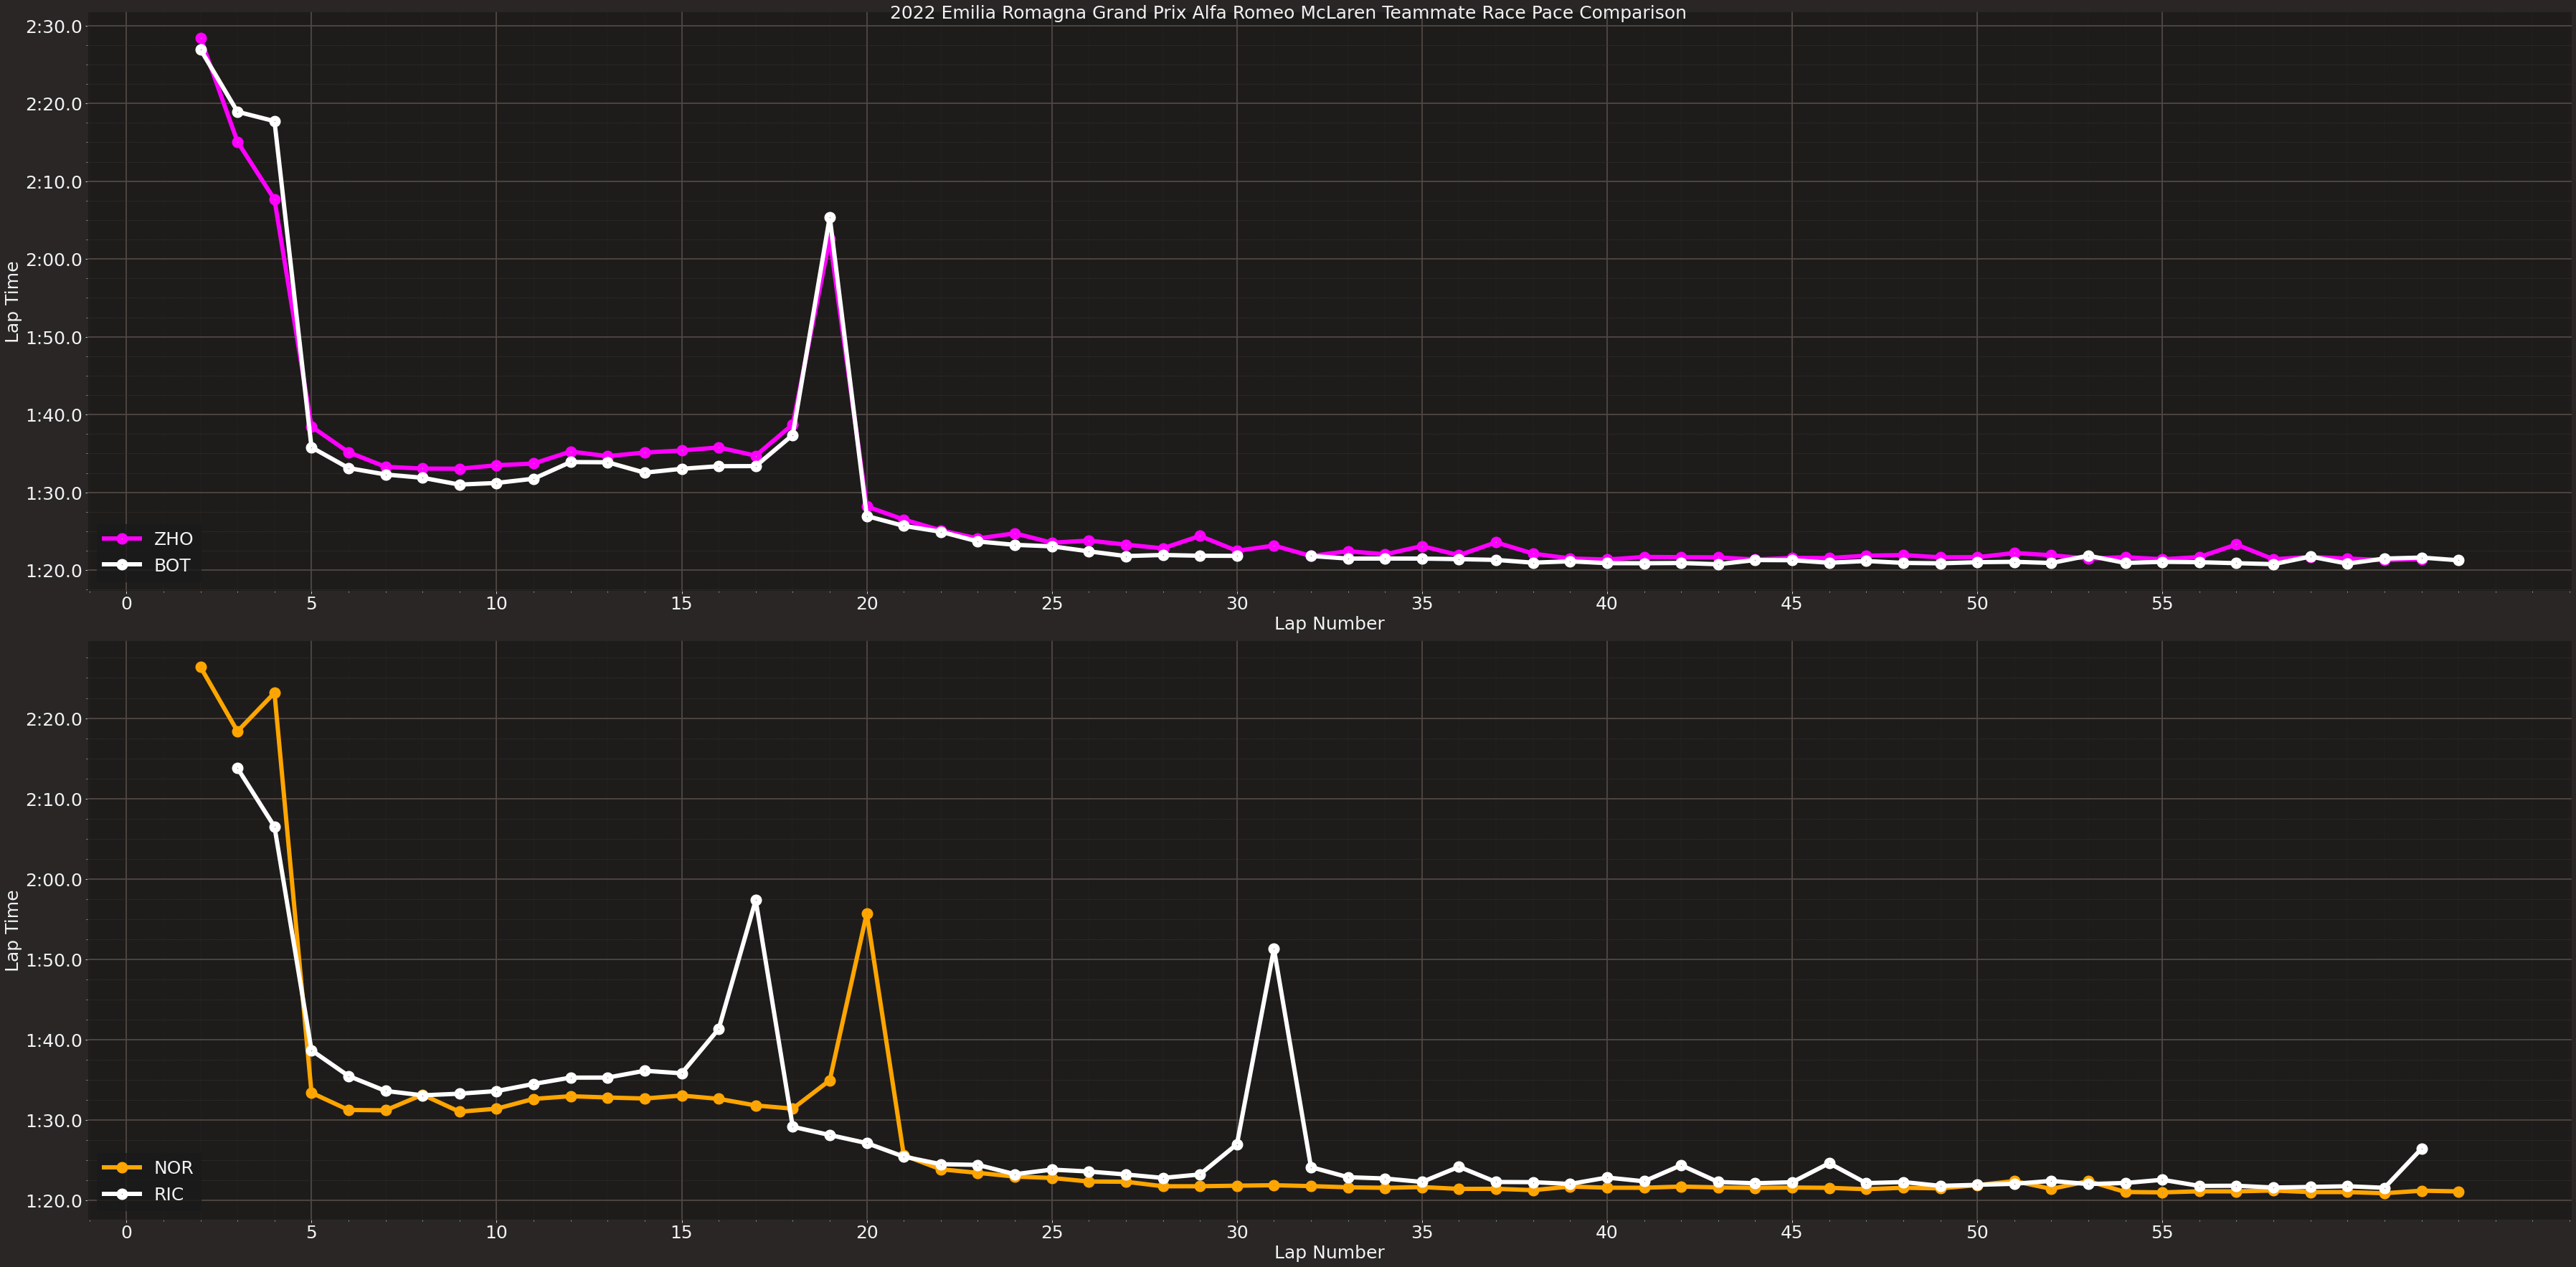

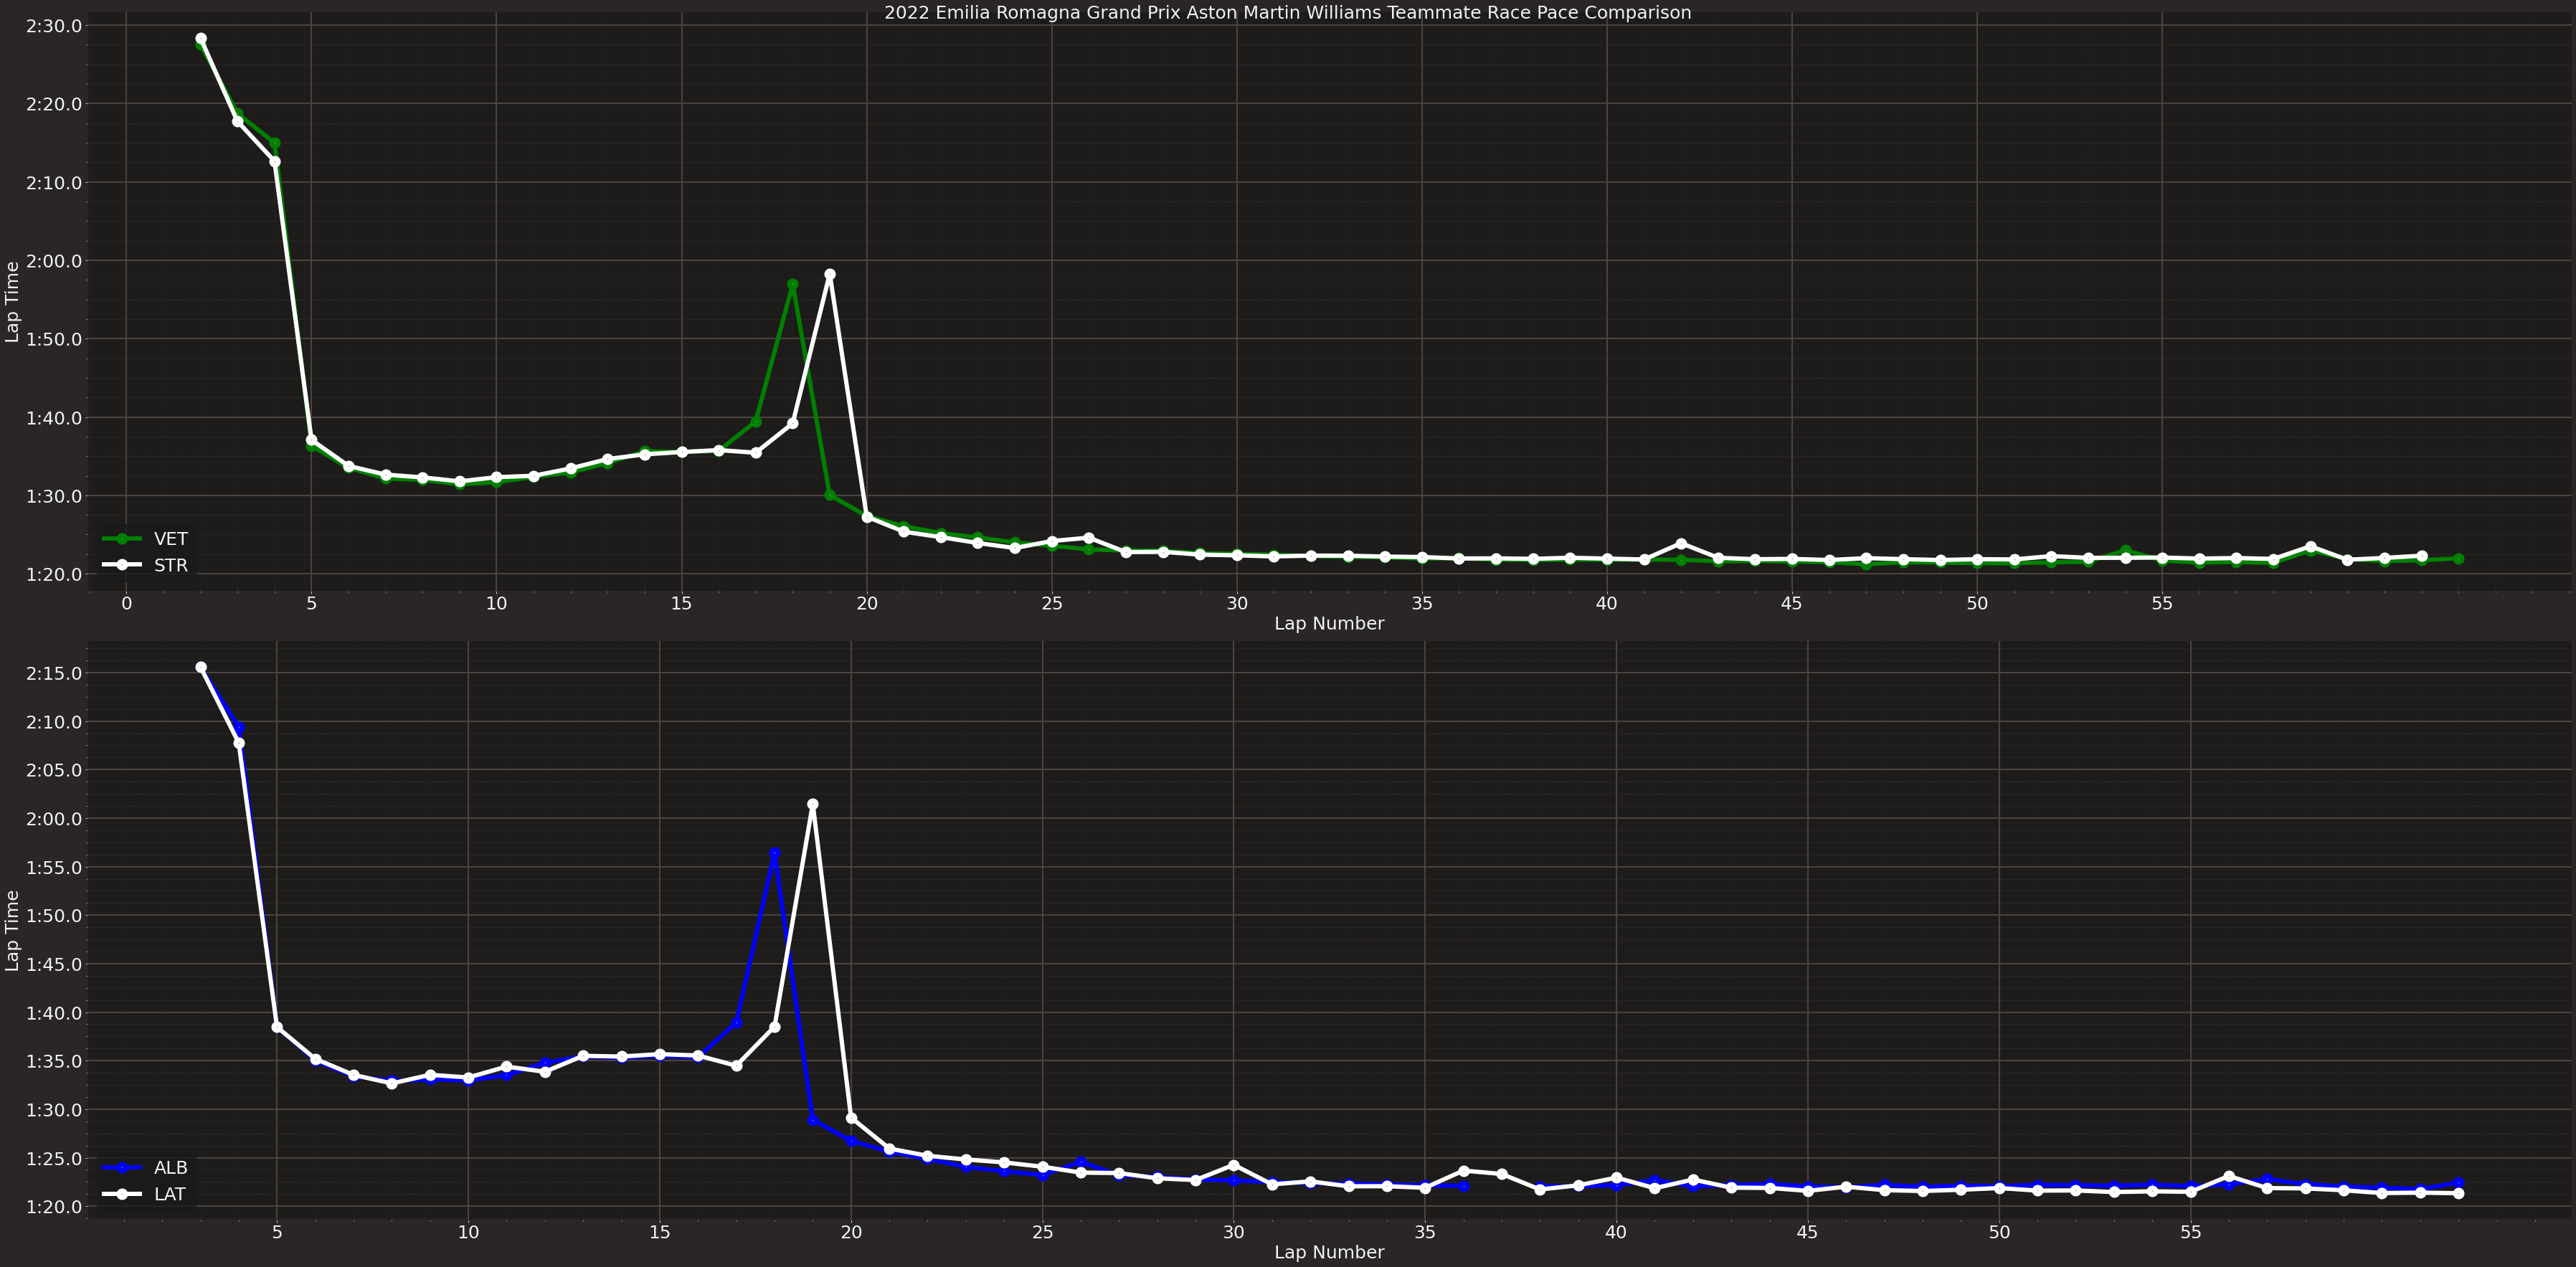

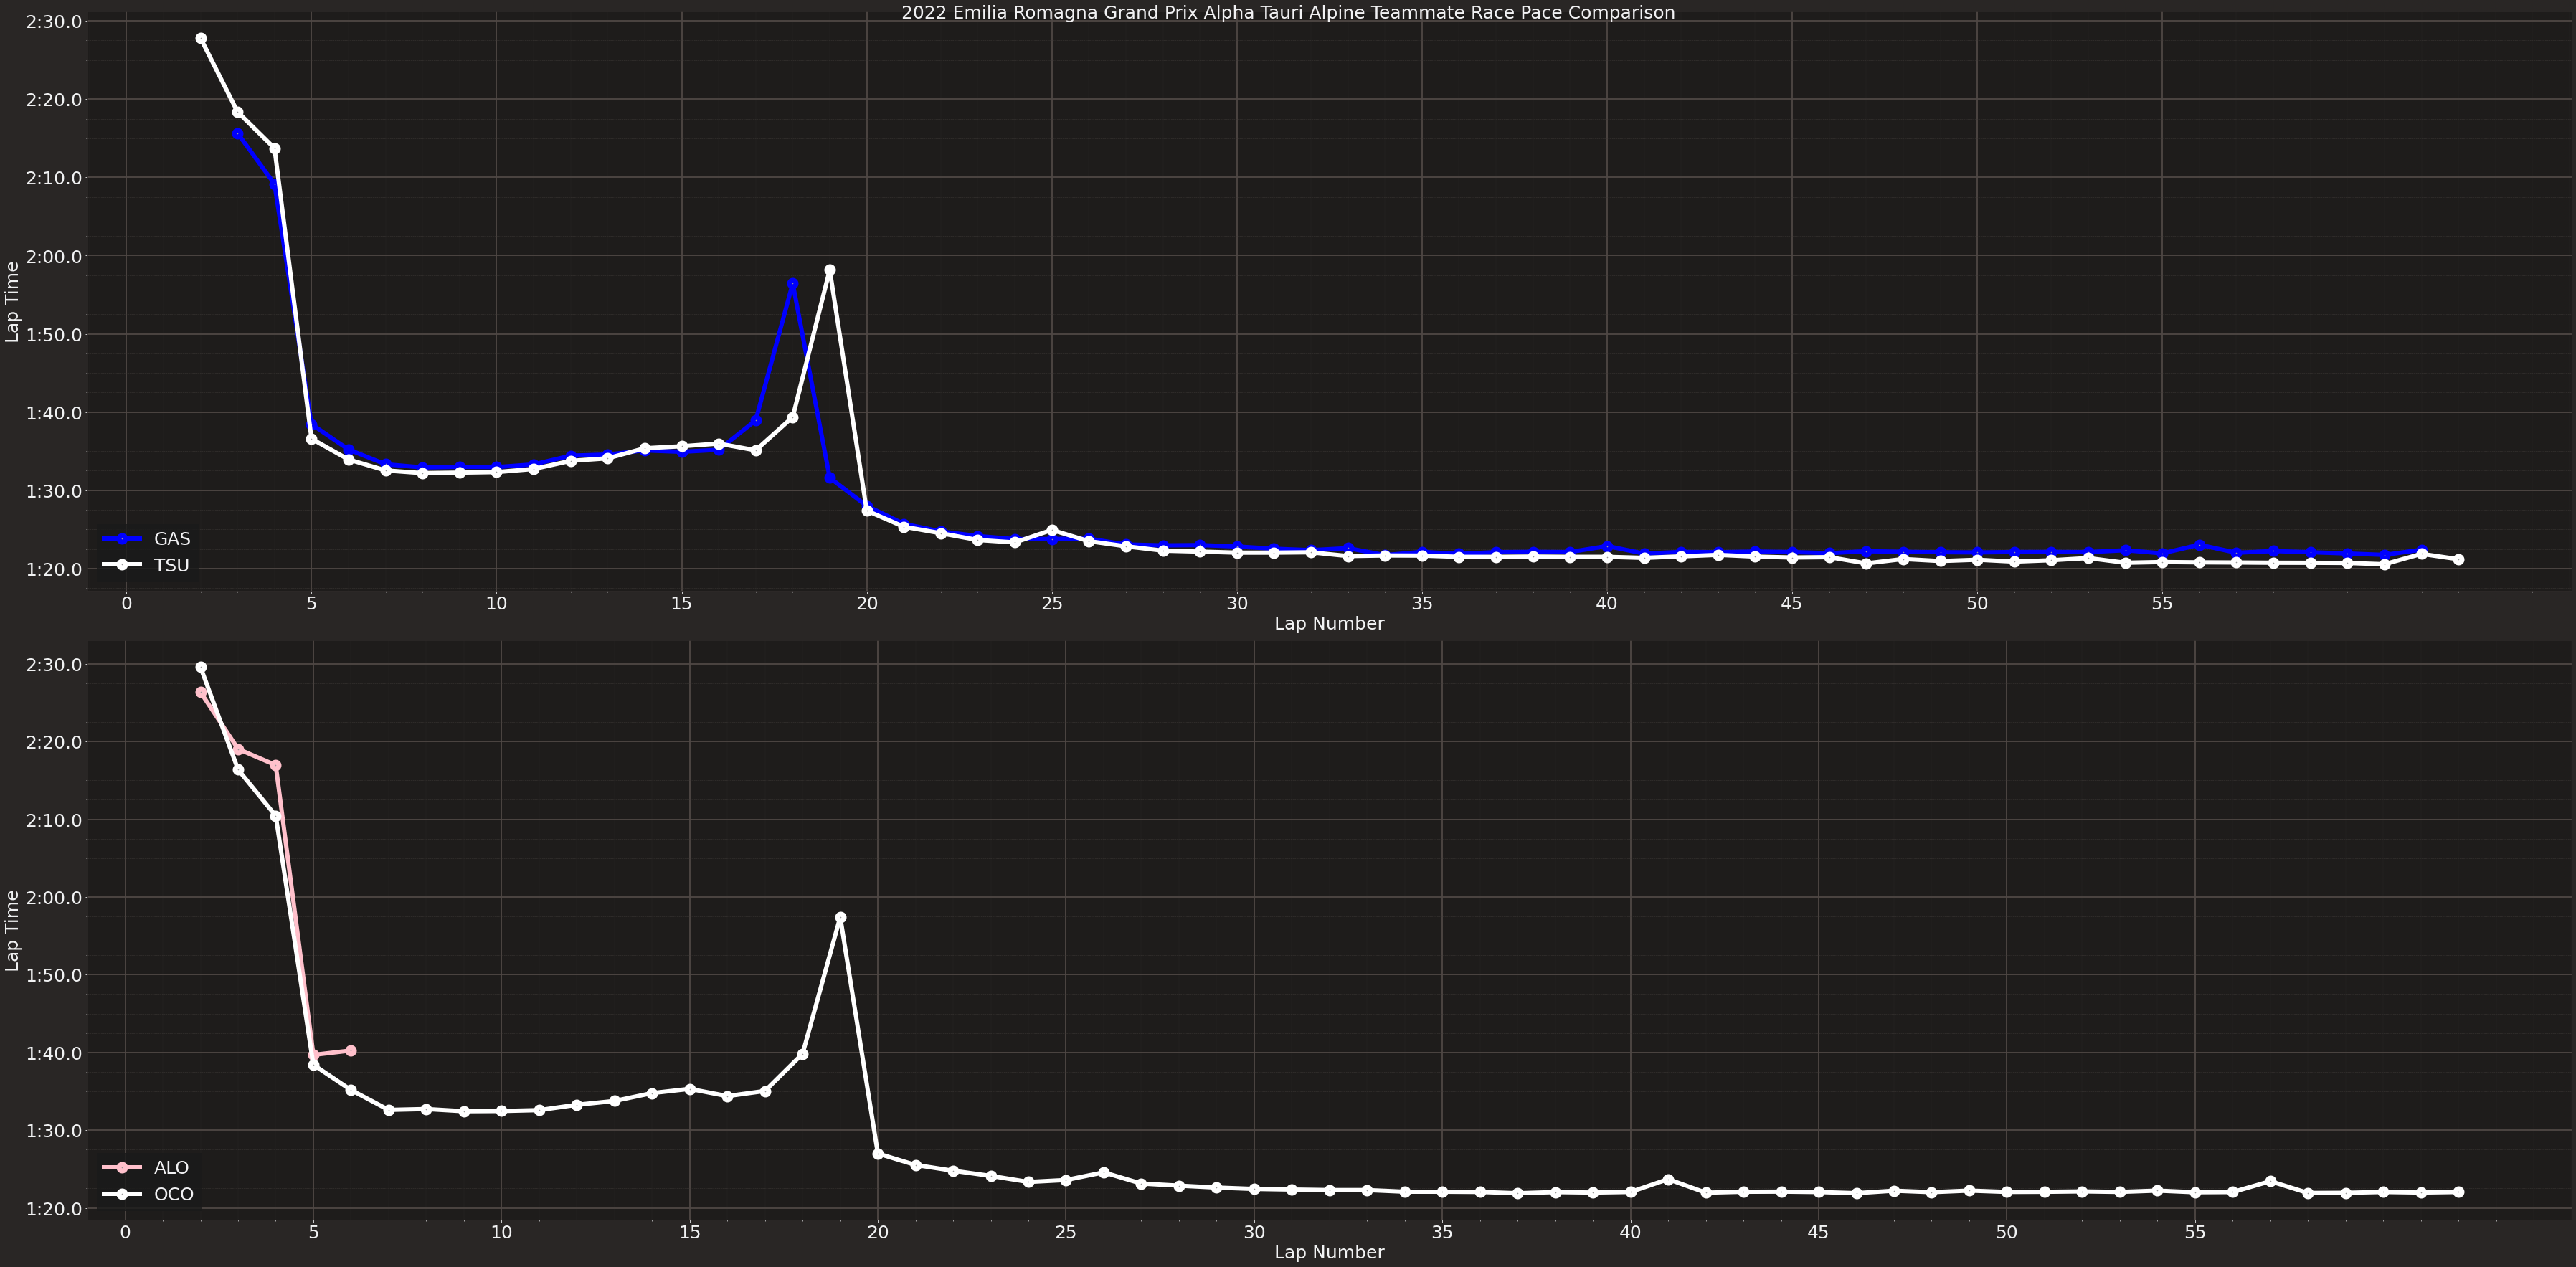

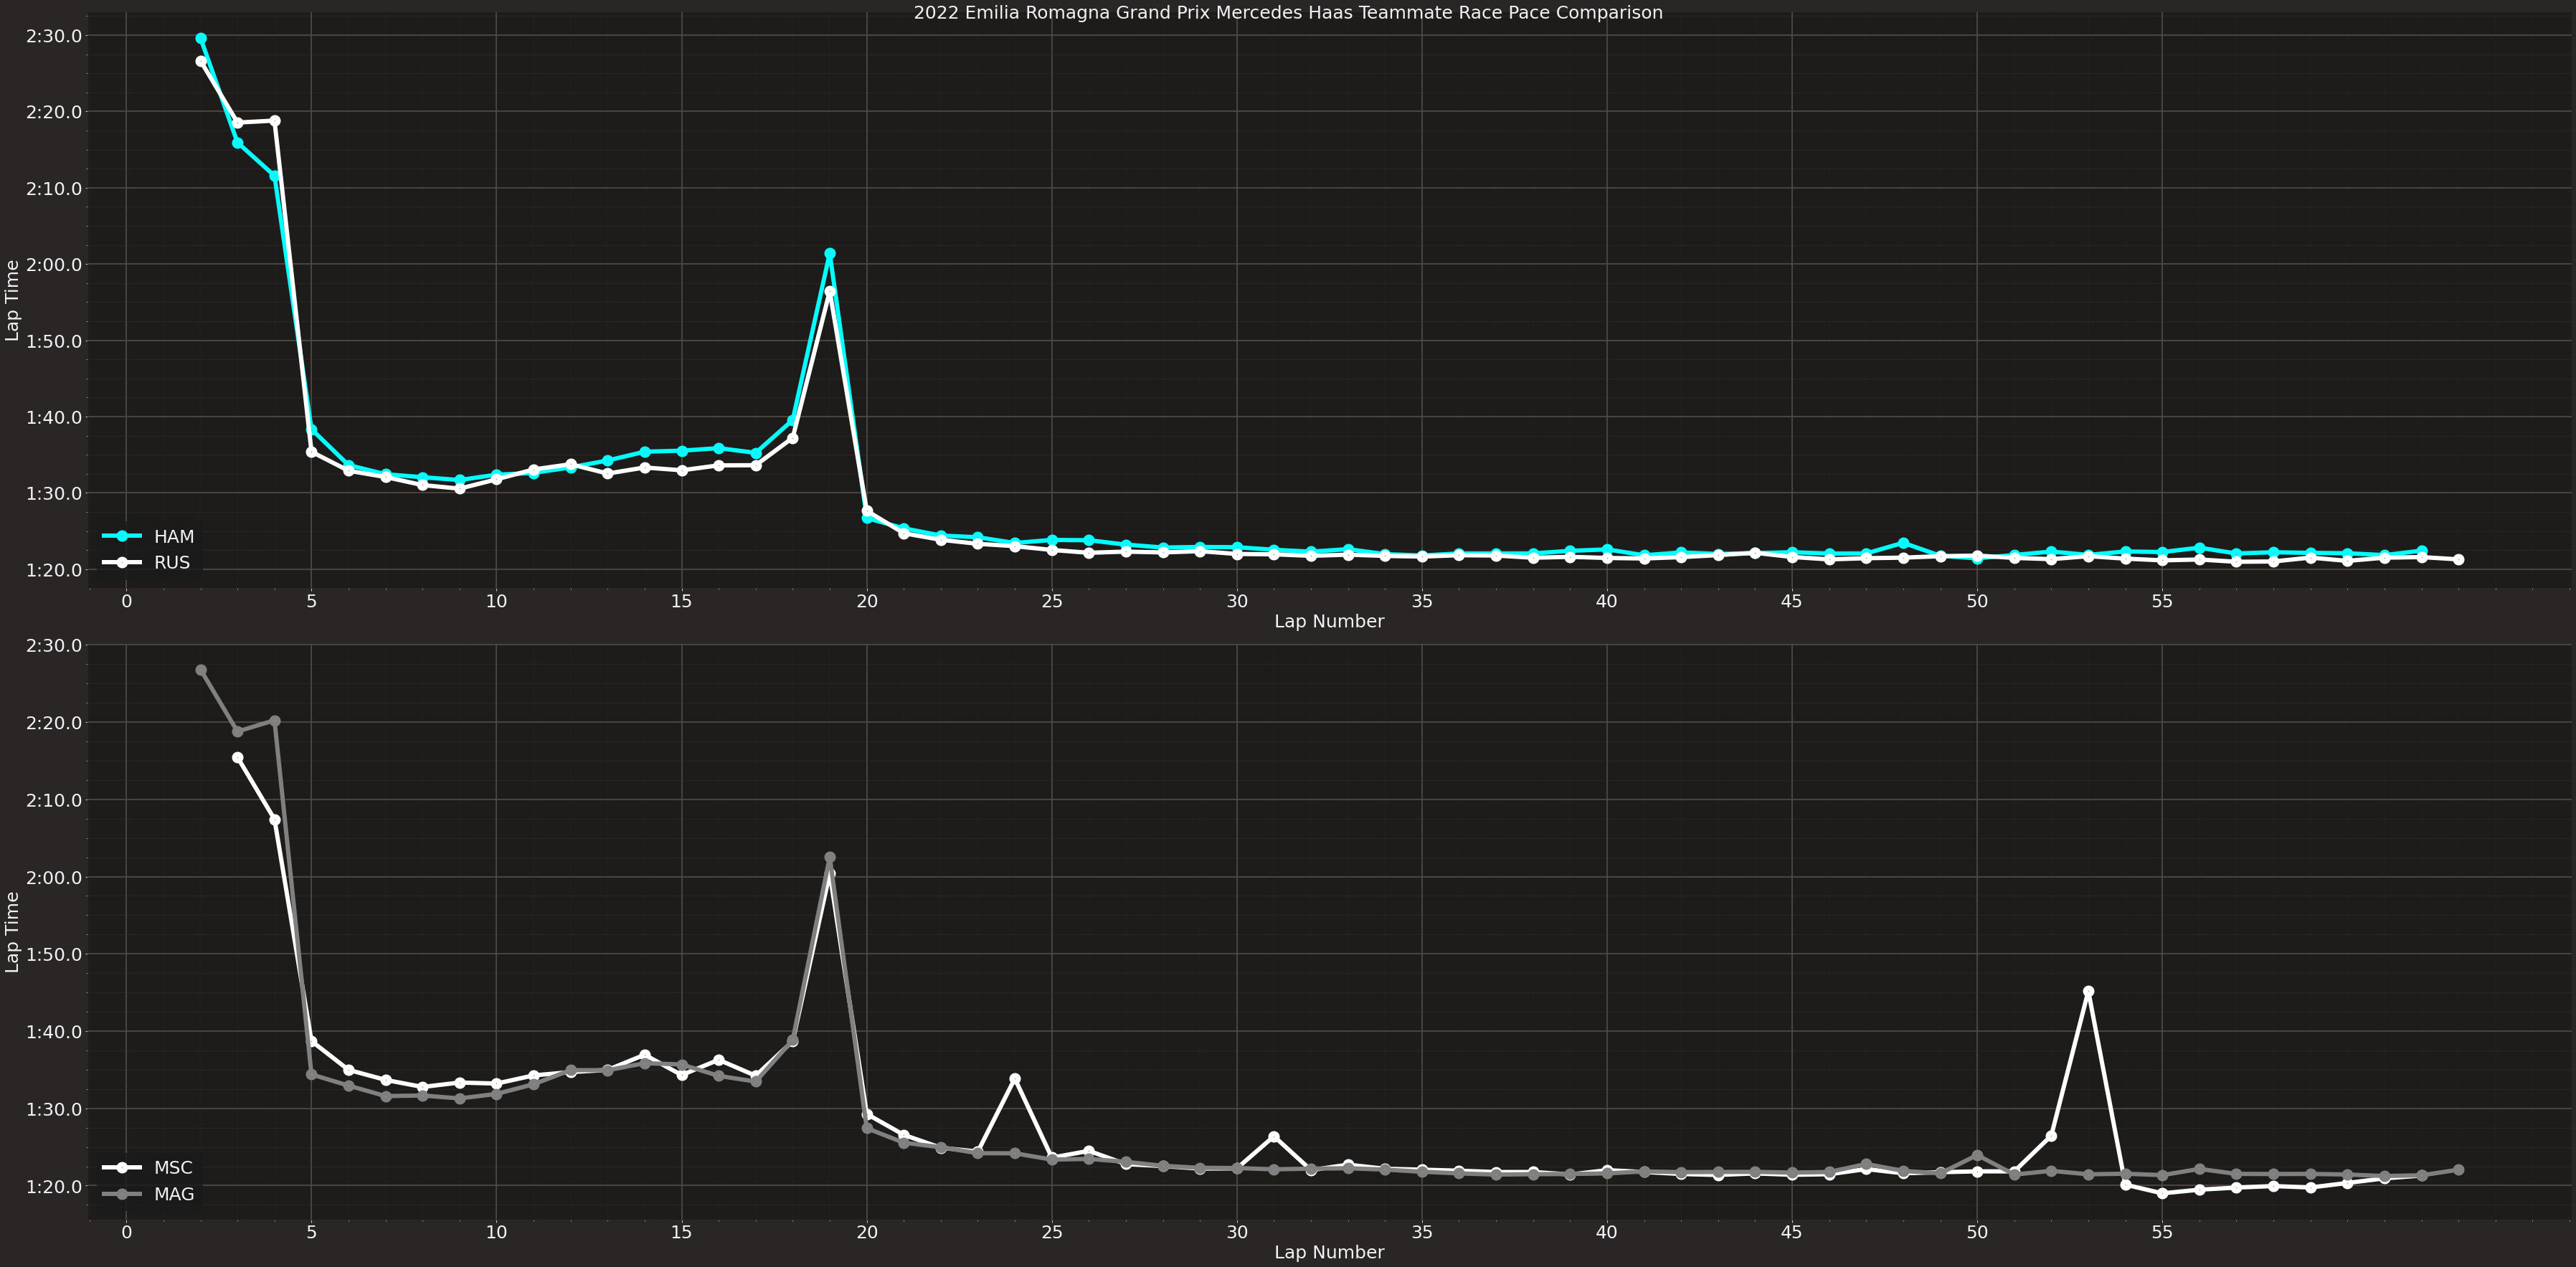

In [46]:
lecl=lapsr.pick_driver('LEC')
sain=lapsr.pick_driver('SAI')
#Not comparing LEC to SAI because SAI got hit off track by Ricciardo on Lap 1 Turn 1.
ver=lapsr.pick_driver('VER')
per=lapsr.pick_driver('PER')

hami=lapsr.pick_driver('HAM')
russ=lapsr.pick_driver('RUS')

sain=lapsr.pick_driver('MAG')
lecl=lapsr.pick_driver('LEC')

bott=lapsr.pick_driver('BOT')
zhou=lapsr.pick_driver('ZHO')

norr=lapsr.pick_driver('NOR')
ricc=lapsr.pick_driver('RIC')

vett=lapsr.pick_driver('VET')
stro=lapsr.pick_driver('STR')

albo=lapsr.pick_driver('ALB')
lati=lapsr.pick_driver('LAT')

gasl=lapsr.pick_driver('GAS')
tsun=lapsr.pick_driver('TSU')

alon=lapsr.pick_driver('ALO')
ocon=lapsr.pick_driver('OCO')

schu=lapsr.pick_driver('MSC')
magn=lapsr.pick_driver('MAG')

fig, ax = plt.subplots(1, tight_layout=True)
plt.gcf().set_size_inches(25,12.5)
ax.tick_params(axis='both', which='major', labelsize=15, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax.tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax.set_xticks(range(0,60,5))
ax.plot(per['LapNumber'], per['LapTime'], label='PER', color='blue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='blue', markeredgewidth=9)
ax.plot(ver['LapNumber'], ver['LapTime'], label='VER', color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax.set_xlabel("Lap Number",fontsize=15)
ax.set_ylabel("Lap Time",fontsize=15)
ax.legend(loc="lower left",fontsize=15)
# ax[1].set_xticks(range(0,60,5))
# ax[1].plot(lecl['LapNumber'], lecl['LapTime'], label='LEC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
# ax[1].plot(sain['LapNumber'], sain['LapTime'], label='SAI',color='red',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='red', markeredgewidth=9)
# ax[1].set_xlabel("Lap Number",fontsize=25)
# ax[1].set_ylabel("Lap Time",fontsize=25)
# ax[1].legend(loc="lower left",fontsize=25)
# ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
# ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
plt.suptitle(f"{year} {circuit} Red Bull Teammate Race Pace Comparison",fontsize=15)
plt.savefig(f"{year} {circuit}  Red Bull Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(zhou['LapNumber'], zhou['LapTime'], label='ZHO',color='magenta',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='magenta', markeredgewidth=9)
ax[0].plot(bott['LapNumber'], bott['LapTime'], label='BOT',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(norr['LapNumber'], norr['LapTime'], label='NOR',color='orange',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='orange', markeredgewidth=9)
ax[1].plot(ricc['LapNumber'], ricc['LapTime'], label='RIC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Alfa Romeo McLaren Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Alfa Romeo McLaren Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(vett['LapNumber'], vett['LapTime'], label='VET',color='green',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='green', markeredgewidth=9)
ax[0].plot(stro['LapNumber'], stro['LapTime'], label='STR',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(albo['LapNumber'], albo['LapTime'], label='ALB',color='blue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='blue', markeredgewidth=9)
ax[1].plot(lati['LapNumber'], lati['LapTime'], label='LAT',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Aston Martin Williams Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Aston Martin Williams Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(gasl['LapNumber'], gasl['LapTime'], label='GAS',color='blue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='blue', markeredgewidth=9)
ax[0].plot(tsun['LapNumber'], tsun['LapTime'], label='TSU',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(alon['LapNumber'], alon['LapTime'], label='ALO',color='pink',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='pink', markeredgewidth=9)
ax[1].plot(ocon['LapNumber'], ocon['LapTime'], label='OCO',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Alpha Tauri Alpine Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Alpha Tauri Alpine Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,60,5))
ax[0].plot(hami['LapNumber'], hami['LapTime'], label='HAM',color='cyan',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='cyan', markeredgewidth=9)
ax[0].plot(russ['LapNumber'], russ['LapTime'], label='RUS',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,60,5))
ax[1].plot(schu['LapNumber'], schu['LapTime'], label='MSC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].plot(magn['LapNumber'], magn['LapTime'], label='MAG',color='grey',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='grey', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Mercedes Haas Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Mercedes Haas Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

### Race Finishing Time Difference Between Teammates

In [47]:
#Getting total time on track of the drivers in seconds
lapsr['TimeSeconds']=lapsr['Time'].dt.total_seconds()
per=lapsr.pick_driver('PER')
per=per.loc[per['TimeSeconds'] == max(per['TimeSeconds'].dropna())]

ver=lapsr.pick_driver('VER')
ver=ver.loc[ver['TimeSeconds'] == max(ver['TimeSeconds'].dropna())]

merge1=pd.merge(per,ver,how='outer')
rf1 = Laps(merge1).sort_values(by='TimeSeconds').reset_index(drop=True)
# print(rf1.dropna(axis=1))

hami=lapsr.pick_driver('HAM')
hami=hami.loc[hami['TimeSeconds'] == max(hami['TimeSeconds'].dropna())]

russ=lapsr.pick_driver('RUS')
russ=russ.loc[russ['TimeSeconds'] == max(russ['TimeSeconds'].dropna())]

merge2=pd.merge(hami,russ,how='outer')
rf2=Laps(merge2).sort_values(by='TimeSeconds').reset_index(drop=True)
# print(rf2.dropna(axis=1))
schu=lapsr.pick_driver('MSC')
schu=schu.loc[schu['TimeSeconds'] == max(schu['TimeSeconds'].dropna(),default=0)]

magn=lapsr.pick_driver('MAG')
magn=magn.loc[magn['TimeSeconds'] == max(magn['TimeSeconds'].dropna())]

merge3=pd.merge(schu,magn,how='outer')
rf3=Laps(merge3).sort_values(by='TimeSeconds').reset_index(drop=True)
# print(rf3.dropna(axis=1))


In [48]:
b1=rf1.loc[rf1['TimeSeconds']==min(rf1['TimeSeconds'])]
best1=float(b1.TimeSeconds)
rf1['RaceTimeDiff']=rf1['TimeSeconds']-best1
# print(rf1[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

b2=rf2.loc[rf2['TimeSeconds']==min(rf2['TimeSeconds'])]
best2=float(b2.TimeSeconds)
rf2['RaceTimeDiff']=rf2['TimeSeconds']-best2
# print(rf2[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

b3=rf3.loc[rf3['TimeSeconds']==min(rf3['TimeSeconds'])]
best3=float(b3.TimeSeconds)
rf3['RaceTimeDiff']=rf3['TimeSeconds']-best3
# print(rf3[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

In [49]:
tcol1 = list()
for index, lap in rf1.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol1.append(color)

tcol2 = list()
for index, lap in rf2.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol2.append(color)
    
tcol3 = list()
for index, lap in rf3.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol3.append(color)

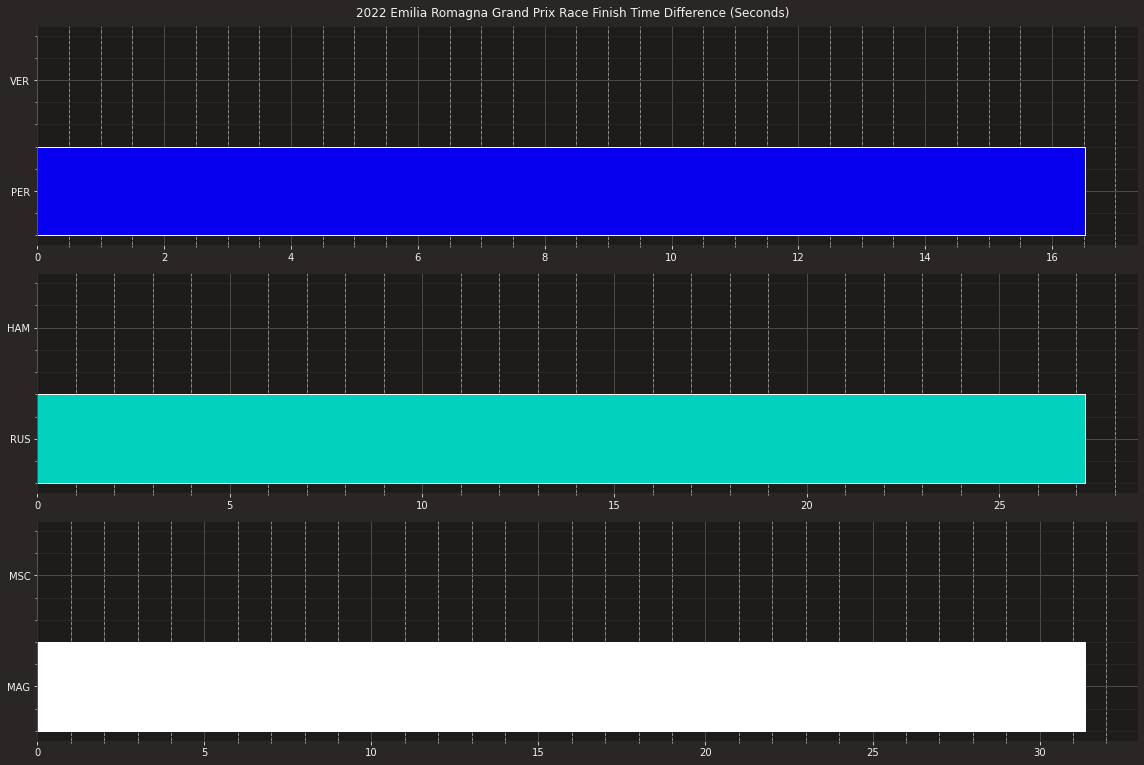

In [50]:
fig, ax = plt.subplots(3,tight_layout=True)

plt.gcf().set_size_inches(16.0,10.8)

ax[0].barh(rf1.index, rf1['RaceTimeDiff'],color=tcol1, edgecolor='white')
ax[0].set_yticks(rf1.index)
ax[0].set_yticklabels(rf1['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)

ax[1].barh(rf2.index, rf2['RaceTimeDiff'],color=tcol2, edgecolor='white')
ax[1].set_yticks(rf2.index)
ax[1].set_yticklabels(rf2['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)

ax[2].barh(rf3.index, rf3['RaceTimeDiff'],color=tcol3, edgecolor='white')
ax[2].set_yticks(rf3.index)
ax[2].set_yticklabels(rf3['Driver'])
ax[2].invert_yaxis()
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
plt.suptitle(f"{year} {circuit} Race Finish Time Difference (Seconds)")


plt.savefig(f"{year} {circuit} Race Finish Time Difference.jpeg", dpi=100)

plt.show()

### Race Finish Time Comparison - All Drivers

In [51]:
#Find first place's minimum race time and subtract that from other driver's times.

In [52]:
# print(race.results[:1])

"""We need to get Max's total time on track in seconds, 
and subtract that to the other drivers'
finishing times to calculate the difference"""

"We need to get Max's total time on track in seconds, \nand subtract that to the other drivers'\nfinishing times to calculate the difference"

In [53]:
drvr = pd.unique(lapsr['Driver'])
drvr=np.array(drvr)
drvr
index=18,19
drvr= np.delete(drvr, index)
drvr

array(['VER', 'PER', 'NOR', 'RUS', 'BOT', 'LEC', 'TSU', 'VET', 'MAG',
       'STR', 'ALB', 'GAS', 'HAM', 'OCO', 'ZHO', 'LAT', 'MSC', 'RIC'],
      dtype=object)

In [54]:
#Converting Race Time into seconds for later.
race.laps['TimeSeconds']=race.laps['Time'].dt.total_seconds()
# race.laps

In [55]:
#Calculating each driver's race time in seconds (TimeSeconds) and sorting the new list with Drivers and those time values
rf=pd.DataFrame([],columns=lapsr.columns)
for d in drvr:
    d=race.laps.pick_driver(d)
    rfilt=(d['TimeSeconds'] == max(d['TimeSeconds'].dropna()))
    e=d.loc[rfilt]
    rf=rf.append(e)
# print(rf.info())
rf['RaceTimeDiff']=rf['TimeSeconds']-(min(rf['TimeSeconds']))
final=rf[['TimeSeconds','RaceTimeDiff','Driver']]
abcde=list(range(0,18))

final=final.sort_values(by='TimeSeconds')
final['index']=abcde
final=final.set_index('index')
final['Index2']=abcde
final
# final.reset_index(drop=True)
# final['index']=abcde
# final=final.set_index('index')

fastestfil=(final['TimeSeconds']==min(final['TimeSeconds']))
fastestmv=final.loc[fastestfil,['Driver','TimeSeconds','Index2']]
fastestmv=fastestmv.set_index('Index2')
fastestmv

,Driver,TimeSeconds
Index2,,
0,VER,9251.485


In [56]:
tcol = list({'ALB': '#005aff', 'SAI': '#ff8181', 'LEC': '#dc0000', 'RIC': '#ff8700',
             'OCO': '#70c2ff', 'ALO': '#0090ff', 'RUS': '#24ffff', 'MAG': '#ffffff',
             'STR': '#25a617', 'NOR': '#eeb370', 'HAM': '#00d2be', 'VER': '#0600ef',
             'MSC': '#cacaca', 'LAT': '#012564', 'HUL': '#2f9b90', 'GAS': '#2b4562', 
             'VET': '#006f62', 'PER': '#716de2', 'BOT': '#900000', 'TSU': '#356cac',
             'ZHO': '#500000'})

In [57]:
my_colors=['#0600ef','#716de2','#eeb370','#24ffff','#900000','#dc0000','#356cac',
           '#006f62','#ffffff','#25a617','#005aff','#2b4562']

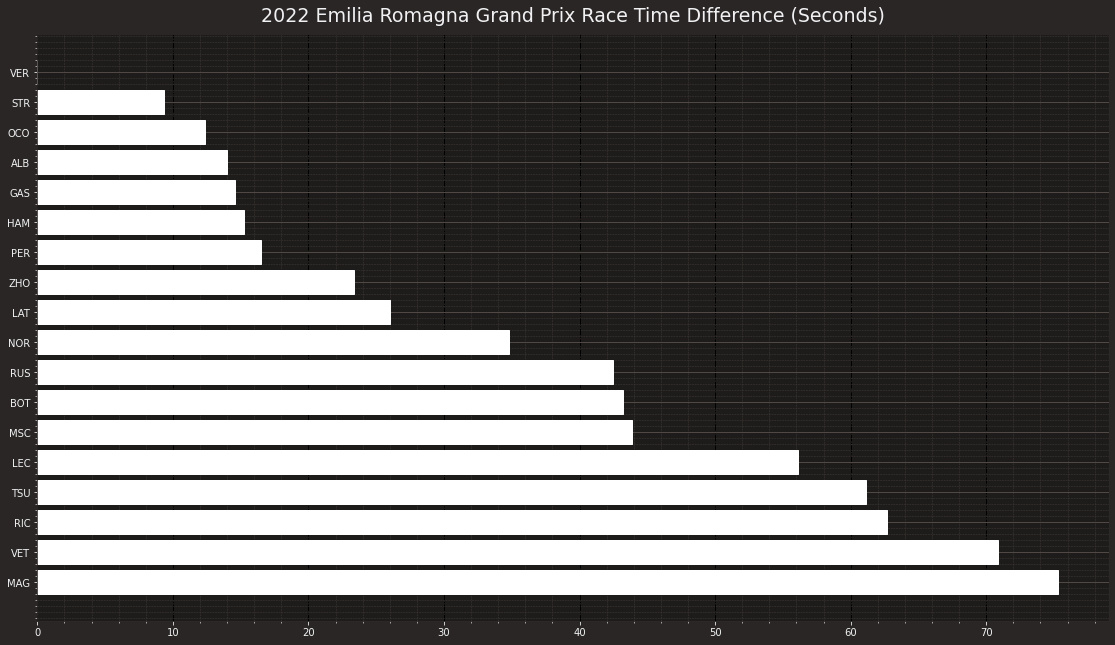

In [58]:
#Plotting - hopefully.
fig, ax = plt.subplots()
plt.gcf().set_size_inches(19.2,10.8)
ax.barh(final.index, final['RaceTimeDiff'],color='w', edgecolor='white')
ax.set_yticks(final.index)
ax.set_yticklabels(final['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='-.', color='black', zorder=-1000)
plt.title(f"{year} {circuit} Race Time Difference (Seconds)")
plt.savefig(f"{year} {circuit} Race Time Difference.png", dpi=100)

plt.show()

### Tyre Strategy Analysis

In [59]:
driver_stints = lapsr[['Driver', 'Stint', 'Compound', 'LapNumber','DriverNumber']].groupby(
                    ['Driver', 'Stint', 'Compound','DriverNumber']
                    ).count().reset_index()
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(by=['Stint'])

compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
    'UNKNOWN':'#FFC0CB'
}
# driver_stints

In [60]:
ts=pd.DataFrame(race.results)
cdict={'Position':int}
ts=ts.astype(cdict)
ts=ts.set_index('Position',drop=True)
# ts

In [61]:
ts2=pd.merge(ts,driver_stints,on='DriverNumber',how='outer')
# ts2

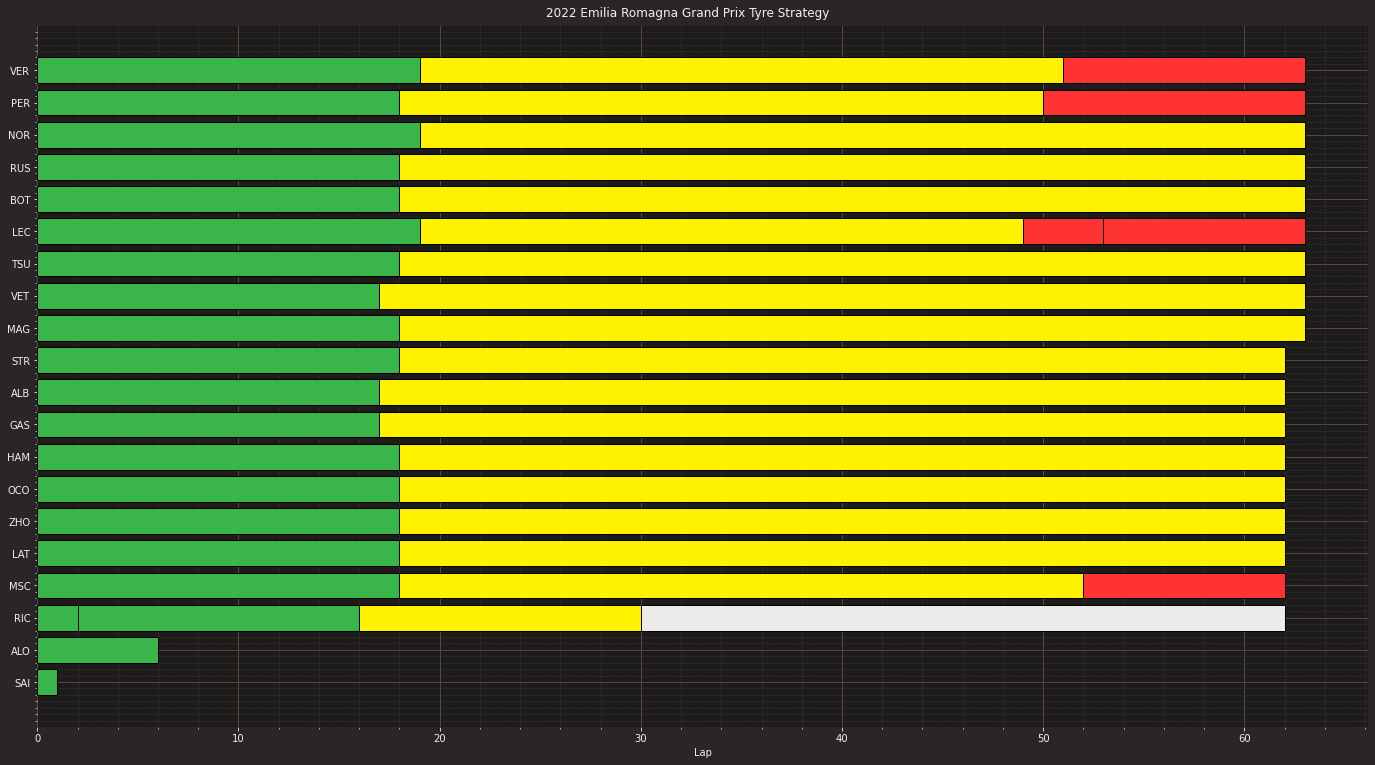

In [77]:

# plt.rcParams["figure.figsize"] = [15, 10]
# plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(19.2,10.8)
for a in ts2['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == a]
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            a, 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
        )
        previous_stint_end = previous_stint_end + stint['StintLength']
plt.suptitle(f"{year} {circuit} Tyre Strategy")
plt.xlabel('Lap')
# plt.text(65,10,'Green = Inter \n White = Hard \n Yellow = Medium \n Red = Soft')
plt.gca().invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig(f'{year} {circuit} Tyre Strategy.jpeg', dpi=100)
plt.show()

## Which driver ran the most laps on a single tyre? 

In [63]:
f=(lapsr['TyreLife'] == max(lapsr['TyreLife'].dropna()))
tl_king=lapsr.loc[f,['Driver','Team','TyreLife','Compound']]
tl_king
#Sebastian Vettel ran the Medium compound tyres for 48 laps.

,Driver,Team,TyreLife,Compound
503,VET,Aston Martin,48.0,MEDIUM


## Time Ahead & Time Behind on a Single Lap

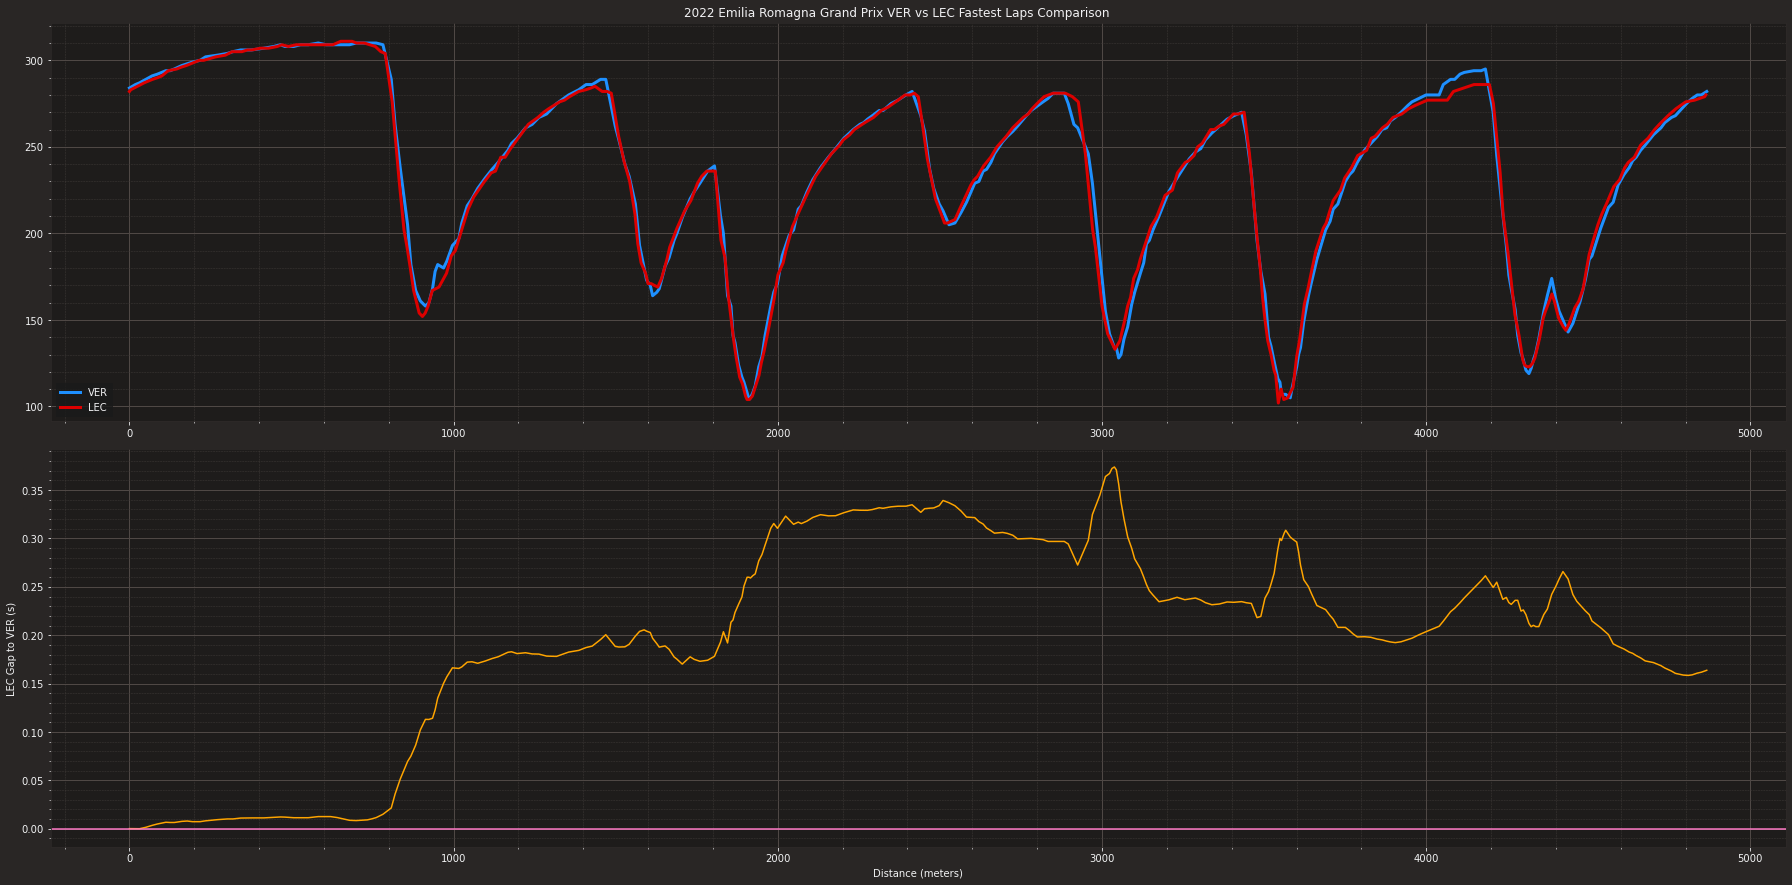

In [72]:
ver = lapsr.pick_driver('VER').pick_fastest()
lec = lapsr.pick_driver('LEC').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(ver, lec)

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(25,12.5)
ax[0].plot(ref_tel['Distance'], ref_tel['Speed'], color='dodgerblue', lw=3, label=ver['Driver'])
ax[0].plot(compare_tel['Distance'], compare_tel['Speed'], color=plotting.team_color(lec['Team']), lw=3, label=lec['Driver'])
ax[0].legend(loc='lower left')
ax[1].plot(ref_tel['Distance'], delta_time, ls='-',color='orange')
ax[1].axhline(0)
ax[1].set(ylabel=f"{lec['Driver']} Gap to {ver['Driver']} (s)",xlabel='Distance (meters)')
plt.suptitle(f"{year} {circuit} {ver['Driver']} vs {lec['Driver']} Fastest Laps Comparison")
plt.savefig(f"{year} {circuit} {ver['Driver']} vs {lec['Driver']} Fastest Laps Comparison.jpeg", dpi=100)
plt.show()